# Background

Walmart is a renowned retail corporation that operates a chain of hypermarkets. Here, Walmart has provided a data combining of 45 stores including store information and monthly sales. The data is provided on weekly basis. Walmart tries to find the impact of holidays on the sales of store. For which it has included four holidays’ weeks into the dataset which are Christmas, Thanksgiving, Super bowl, Labor Day. Here we are owing to Analyze the dataset given. Before doing that, let me point out the objective of this analysis.

# Business Objectives

Our Main Objective is to predict sales of store in a week. As in dataset size and time related data are given as feature, so analyze if sales are impacted by time-based factors and space- based factor. Most importantly how inclusion of holidays in a week soars the sales in store?

# Importing Necessary Libraries and Data

Kode ini mengimpor berbagai library Python yang umum digunakan untuk analisis data, pemrosesan time series, visualisasi, dan machine learning. Berikut rinciannya:

#### **1. Library untuk Data Numerik & Struktur Data**
```python
import numpy as np      # Untuk operasi array/matriks numerik
import pandas as pd     # Untuk manipulasi dataframe (tabel data)
```
- **`numpy`**: Digunakan untuk komputasi numerik (operasi vektor/matriks).
- **`pandas`**: Untuk mengolah data terstruktur (seperti Excel dalam Python).

#### **2. Library untuk Visualisasi**
```python
import matplotlib.pyplot as plt  # Plot dasar
%matplotlib inline               # Agar plot muncul di notebook
import matplotlib as mpl         # Konfigurasi tambahan matplotlib
import seaborn as sns            # Plot statistik yang lebih estetis
from pandas.plotting import autocorrelation_plot as auto_corr  # Plot autokorelasi
```
- **`matplotlib`** dan **`seaborn`**: Untuk membuat grafik (plot).
- **`autocorrelation_plot`**: Khusus memvisualisasikan autokorelasi data time series.

#### **3. Library untuk Tanggal/Waktu**
```python
import math
from datetime import datetime    # Manipulasi tanggal/waktu
from datetime import timedelta   # Operasi selisih waktu
```
- **`datetime`**: Untuk menghandle data tanggal/waktu.

#### **4. Library untuk Analisis Time Series**
```python
import statsmodels.api as sm          # Analisis statistik
import statsmodels.tsa.api as smt     # Time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose as season  # Dekomposisi musiman
from statsmodels.tsa.holtwinters import ExponentialSmoothing  # Model peramalan
from statsmodels.tsa.stattools import adfuller, acf, pacf  # Uji stasioneritas & autokorelasi
from statsmodels.tsa.arima_model import ARIMA  # Model ARIMA klasik
```
- **`statsmodels`**: Untuk pemodelan statistik (termasuk time series seperti ARIMA).
- **`seasonal_decompose`**: Memisahkan data menjadi tren, musiman, dan residu.
- **`adfuller`**: Uji Dickey-Fuller untuk memeriksa stasioneritas data.

#### **5. Library Machine Learning (Scikit-Learn)**
```python
from sklearn.model_selection import train_test_split  # Pembagian data training-test
from sklearn.metrics import mean_squared_error, mean_absolute_error  # Evaluasi model
from sklearn.ensemble import RandomForestRegressor    # Model Random Forest
from sklearn.linear_model import LinearRegression     # Model regresi linear
from sklearn.preprocessing import preprocessing       # Normalisasi data
```
- **`scikit-learn`**: Untuk pembuatan model machine learning (regresi, klasifikasi, dll.).

#### **6. Library Tambahan untuk ARIMA Otomatis**
```python
!pip install numpy==1.23.5  # Install versi spesifik numpy
from pmdarima.arima import auto_arima  # Mencari parameter ARIMA optimal secara otomatis
from pmdarima.utils import decomposed_plot  # Plot dekomposisi
```
- **`pmdarima`**: Library untuk otomatisasi pemilihan model ARIMA (`auto_arima`).
- **`!pip install numpy==1.23.5`**: Menginstal versi tertentu numpy (karena kompatibilitas).

#### **7. Penanganan Peringatan (Warnings)**
```python
import warnings
warnings.filterwarnings("ignore")  # Menyembunyikan pesan peringatan
```
- Menghindari gangguan dari pesan peringatan yang tidak kritikal.

In [1]:
import numpy as np      # To use np.arrays
import pandas as pd     # To use dataframes
from pandas.plotting import autocorrelation_plot as auto_corr

# To plot
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
import seaborn as sns

#For date-time
import math
from datetime import datetime
from datetime import timedelta

# Another imports if needs
import itertools
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from statsmodels.tsa.seasonal import seasonal_decompose as season
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA
!pip install numpy==1.23.5
!pip install pmdarima
from pmdarima.utils import decomposed_plot
from pmdarima.arima import decompose
from pmdarima.arima import auto_arima


import warnings
warnings.filterwarnings("ignore")

- Library numpy versi 1.23.5 sudah terinstal sebelumnya di lingkungan Python, sehingga tidak perlu mengunduh ulang.
- Lokasi instalasi: /usr/local/lib/python3.11/dist-packages/.

---



Secara default, Pandas hanya menampilkan beberapa kolom saat menampilkan DataFrame (untuk menghindari output yang terlalu panjang). Kode ini mengatur agar semua kolom (hingga 100 kolom) ditampilkan saat mencetak DataFrame.

In [2]:
pd.options.display.max_columns=100 # to see columns

Import seluruh dataset yang diperlukan

In [3]:
df_store = pd.read_csv('stores.csv') #store data

In [4]:
df_train = pd.read_csv('train.csv') # train set

In [5]:
df_features = pd.read_csv('features.csv') #external information

# First Look to Data and Merging Three Dataframes

Menampilkan seluruh dataset yang di-import
1. store.csv
2. trian.csv
3. features.csv

In [6]:
df_store.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [7]:
df_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [8]:
df_features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


Menggabungkan 3 DataFrame (`df_train`, `df_features`, `df_store`) menjadi satu DataFrame (`df`) dengan dua langkah merge:
1. Merge Pertama: Menggabungkan `df_train` dan `df_features` berdasarkan kolom `Store` dan `Date` dengan metode `inner`.
2. Merge Kedua: Hasil merge pertama kemudian digabungkan dengan `df_store` berdasarkan kolom `Store` (juga dengan `inner`).

In [9]:
# merging 3 different sets
df = df_train.merge(df_features, on=['Store', 'Date'], how='inner').merge(df_store, on=['Store'], how='inner')
df.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


Menghapus kolom `IsHoliday_y` dari DataFrame `df` karena merupakan kolom redundan (duplikat) setelah proses merge sebelumnya.

In [10]:
df.drop(['IsHoliday_y'], axis=1,inplace=True) # removing dublicated column

Mengubah nama kolom `IsHoliday_x` menjadi `IsHoliday` untuk penyederhanaan dan konsistensi.

In [11]:
df.rename(columns={'IsHoliday_x':'IsHoliday'},inplace=True) # rename the column

In [12]:
df.head() # last ready data set

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


Kode df.shape digunakan untuk menampilkan dimensi DataFrame dalam bentuk tuple (jumlah_baris, jumlah_kolom). Ini adalah cara cepat untuk memahami ukuran dataset Anda.

In [13]:
df.shape

(421570, 16)

Output ini menunjukkan bahwa DataFrame df Anda memiliki:
- 421.570 baris (observasi/data points)
- 16 kolom (variabel/fitur)

# Store & Department Numbers

Menghitung jumlah nilai unik (berbeda) dalam kolom `'Store'` dari DataFrame `df`.

In [14]:
df['Store'].nunique() # number of different values

45

Terdapat 45 toko berbeda dalam dataset Anda. Setiap angka pada kolom Store mewakili ID unik sebuah toko.

Menghitung jumlah nilai unik (berbeda) dalam kolom `'Dept'` dari DataFrame `df`.

In [15]:
df['Dept'].nunique() # number of different values

81

Terdapat 81 departemen berbeda dalam dataset Anda. Setiap angka pada kolom Dept mewakili ID unik sebuah departemen di toko.

Melihat rata-rata penjualan mingguan untuk setiap toko dan setiap departemen untuk melihat apakah ada nilai yang aneh atau tidak. Ada 45 toko dan 81 departemen untuk toko.

In [16]:
store_dept_table = pd.pivot_table(df, index='Store', columns='Dept',
                                  values='Weekly_Sales', aggfunc=np.mean)
display(store_dept_table)

Dept,1,2,3,4,5,6,7,8,9,10,11,12,13,14,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,54,55,56,58,59,60,65,67,71,72,74,77,78,79,80,81,82,83,85,87,90,91,92,93,94,95,96,97,98,99
Store,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,22513.322937,46102.090420,13150.478042,36964.154476,24257.941119,4801.780140,24566.487413,35718.257622,28062.052238,31033.386364,24919.270629,10566.545315,38692.880490,15268.550909,24151.061329,9196.557902,7765.304425,1259.018531,4091.571538,7808.450559,8052.076154,21623.184685,6187.389720,10152.336783,6767.997273,1374.649650,593.113986,4651.040210,3415.295035,2408.533287,8202.668392,5946.431189,11530.831678,2535.730909,1476.203566,2800.495105,79978.222587,NaN,58510.409161,1064.769650,7940.326224,NaN,4872.724406,23.995070,19662.989860,-116.454545,917.727920,11437.931259,NaN,32.712727,2355.439371,90.921053,12817.843357,4000.480629,3372.474476,857.775105,1020.995804,NaN,7436.017343,2732.473357,47390.644895,11652.827413,677.000000,11.500000,33974.792937,17139.314615,29780.696573,20727.860909,5704.048951,3685.875524,46006.277203,82427.547832,64238.943427,135458.969510,71699.182378,63180.568182,120772.062168,33251.831639,35207.348811,11827.770769,306.091081
2,30777.980769,65912.922517,17476.563357,45607.666573,30555.315315,6808.382517,40477.837063,58707.369441,34375.864476,38845.854476,23382.686154,7735.946294,46117.959231,21314.132937,27005.179650,13790.854196,11687.563009,4053.439930,5748.619441,9910.939860,12923.013846,29170.616573,8309.564545,15299.508392,9347.725105,1837.954615,798.913217,7111.482657,4981.155385,3884.756993,11755.096713,7488.096993,17595.203497,3875.588601,2631.750559,4500.250769,85114.996014,2.340000,78174.560210,2592.220769,8768.857692,NaN,7245.541189,29.139848,29675.324545,18.068182,1358.347914,15568.465664,NaN,16.226667,4148.373566,104.502868,13060.297692,5545.122308,21610.019091,1391.520559,221.545946,NaN,12125.255594,4634.609371,72929.496643,16986.406014,817.500000,11.764000,32759.096993,26041.273566,31000.484266,24647.232587,5710.719650,3672.042797,24932.985804,97611.537133,80610.380350,164840.230979,70581.977063,70018.672517,143588.751888,34319.063846,40697.204056,14035.400839,475.896905
3,7328.621049,16841.775664,5509.300769,8434.186503,11695.366573,2012.411818,10044.341608,8310.254196,9062.007692,10871.944126,8774.928042,2383.603007,11363.061678,4626.649021,7871.568322,2634.199650,2960.677739,731.313147,1682.199231,1244.529650,3101.769860,10913.330070,2763.627343,4260.447972,2850.050839,500.193636,166.870070,1517.404056,1243.926993,878.475455,4296.111049,3228.155105,4579.719161,1439.325524,622.689371,NaN,108598.364126,NaN,18203.108252,646.832028,4422.944406,NaN,2133.657762,9.922500,6179.259510,38.875000,NaN,17.581481,NaN,5.411803,961.390210,58.311239,7153.737902,1606.808881,NaN,244.878455,138.125874,NaN,2021.482657,1101.610000,22796.856573,3374.960769,424.000000,6.000000,7230.372448,24.420476,1429.300070,6746.578392,19.330000,874.128182,939.435455,1540.049161,318.685594,7568.280210,NaN,656.294444,15745.528252,3934.540000,343.437357,30.570833,NaN
4,36979.940070,93639.315385,19012.491678,56603.400140,45668.406783,8241.777692,50728.151399,62949.723776,34437.170979,37269.667413,27145.836643,8141.910979,69596.447343,28567.509441,21270.153007,15815.878042,13146.543790,3038.317762,8888.302867,8865.273147,17289.916294,46234.012867,10875.301189,15640.748531,18429.759930,2579.906154,916.232238,9472.121189,7683.686783,3813.243986,13685.430350,12304.056224,25142.675385,4376.574755,3005.231469,3640.752727,80093.946084,1.560000,78729.263077,975.417622,9511.818531,NaN,5441.563566,13.696939,39128.896154,23.536154,2324.615532,6911.676643,NaN,8.200000,3721.521329,131.887000,18662.627203,6040.540839,6078.142308,1586.446993,410.795105,NaN,12471.426713,7686.018741,101244.450839,20627.307762,344.571429,5.375000,52436.656923,19379.101399,31055.285315,29371.320979,9161.217343,2730.060000,14223.462308,8

Nomor toko dimulai dari 1 hingga 45, nomor departemen dari 1 hingga 99, tetapi beberapa nomor hilang seperti tidak ada angka 88 atau 89, dsb. Jumlah total departemen adalah 81.

Dari tabel pivot, terlihat jelas bahwa ada beberapa nilai yang salah seperti ada nilai 0 dan minus untuk penjualan mingguan. Namun jumlah penjualan tidak boleh minus. Selain itu, tidak mungkin satu departemen tidak menjual apa pun selama seminggu penuh. Jadi, saya akan mengubah nilai ini.

In [17]:
df.loc[df['Weekly_Sales']<=0]

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
846,1,6,2012-08-10,-139.65,False,85.05,3.494,11436.22,245.0,6.85,6964.26,4836.22,221.958433,6.908,A,151315
2384,1,18,2012-05-04,-1.27,False,75.55,3.749,21290.13,NaN,69.89,4977.35,3261.04,221.671800,7.143,A,151315
6048,1,47,2010-02-19,-863.00,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
6049,1,47,2010-03-12,-698.00,False,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,A,151315
6051,1,47,2010-10-08,-58.00,False,63.93,2.633,NaN,NaN,NaN,NaN,NaN,211.746754,7.838,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419597,45,80,2010-02-12,-0.43,True,27.73,2.773,NaN,NaN,NaN,NaN,NaN,181.982317,8.992,B,118221
419598,45,80,2010-02-19,-0.27,False,31.27,2.745,NaN,NaN,NaN,NaN,NaN,182.034782,8.992,B,118221
419603,45,80,2010-04-16,-1.61,False,54.28,2.899,NaN,NaN,NaN,NaN,NaN,181.692477,8.899,B,118221
419614,45,80,2010-07-02,-0.27,False,76.61,2.815,NaN,NaN,NaN,NaN,NaN,182.318780,8.743,B,118221


1358 rows in 421570 rows means 0.3%, so I can delete and ignore these rows which contains wrong sales values.

Memfilter DataFrame (`df`) untuk hanya menyimpan baris dimana nilai kolom `Weekly_Sales` lebih besar dari 0.

In [18]:
df = df.loc[df['Weekly_Sales'] > 0]

In [19]:
df.shape # new data shape

(420212, 16)

Output ini menunjukkan bahwa DataFrame df Anda memiliki:
- 420.212 baris (observasi/data points)
- 16 kolom (variabel/fitur)

# Date
Menampilkan 5 baris pertama dan 5 baris terakhir dari kolom Date dalam DataFrame df secara bersamaan.

In [20]:
pd.concat([df['Date'].head(5).to_frame(), df['Date'].tail(5).to_frame()]) # to see first and last 5 rows.

,Date
0,2010-02-05
1,2010-02-12
2,2010-02-19
3,2010-02-26
4,2010-03-05
421565,2012-09-28
421566,2012-10-05
421567,2012-10-12
421568,2012-10-19
421569,2012-10-26


Our data is from 5th of February 2010 to 26th of October 2012.  

# IsHoliday column
Membuat bar plot untuk membandingkan rata-rata penjualan mingguan (`Weekly_Sales`) antara hari libur (`IsHoliday=True`) dan hari biasa (`IsHoliday=False`).

<Axes: xlabel='IsHoliday', ylabel='Weekly_Sales'>

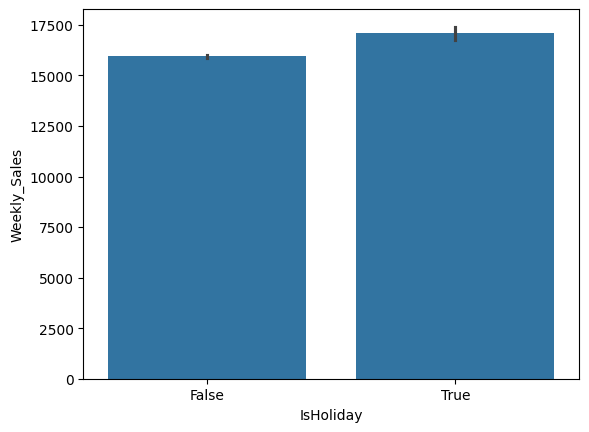

In [21]:
sns.barplot(x='IsHoliday', y='Weekly_Sales', data=df)

penjualan mingguan lebih tinggi pada hari libur dibanding hari biasa.

Membuat DataFrame baru (`df_holiday`) yang hanya berisi data pada hari libur (`IsHoliday=True`). Menampilkan daftar tanggal unik (`unique()`) ketika hari libur terjadi dalam dataset.

In [22]:
df_holiday = df.loc[df['IsHoliday']==True]
df_holiday['Date'].unique()

array(['2010-02-12', '2010-09-10', '2010-11-26', '2010-12-31',
       '2011-02-11', '2011-09-09', '2011-11-25', '2011-12-30',
       '2012-02-10', '2012-09-07'], dtype=object)

In [23]:
df_not_holiday = df.loc[df['IsHoliday']==False]
df_not_holiday['Date'].nunique()

133

#### Analisis Tanggal Liburan
1. Pola Tahunan:
  - Februari: 12 Feb 2010, 11 Feb 2011, 10 Feb 2012 → Super Bowl (Ahad minggu ke-2 Februari).
  - September: 10 Sep 2010, 9 Sep 2011, 7 Sep 2012 → Labor Day (Senin minggu ke-1 September).
  - November: 26 Nov 2010, 25 Nov 2011 → Thanksgiving (Kamis ke-4 November).
  - Desember: 31 Des 2010, 30 Des 2011 → Tahun Baru (pekan terakhir Desember).
2. Hari Libur yang Tidak Ada:
  - Natal (25 Des) tidak muncul karena mungkin toko tutup atau data tidak tercatat.
  - Independence Day (4 Juli) tidak terdeteksi, mungkin karena bukan periode promosi penjualan.


Setelah hari libur 07-Sep-2012, kami menguji prediksi. Ketika kita melihat data, penjualan mingguan rata-rata untuk hari libur jauh lebih tinggi daripada hari-hari biasa. Dalam data kereta, ada 133 minggu untuk hari biasa dan 10 minggu untuk hari libur.

Saya ingin melihat perbedaan antara jenis hari libur. Jadi, saya membuat kolom baru untuk 4 jenis hari libur dan mengisinya dengan nilai boolean. Jika tanggal termasuk dalam jenis hari libur ini, maka nilainya Benar, jika tidak Salah.

In [24]:
# Super bowl dates in train set
df.loc[(df['Date'] == '2010-02-12')|(df['Date'] == '2011-02-11')|(df['Date'] == '2012-02-10'),'Super_Bowl'] = True
df.loc[(df['Date'] != '2010-02-12')&(df['Date'] != '2011-02-11')&(df['Date'] != '2012-02-10'),'Super_Bowl'] = False

In [25]:
# Labor day dates in train set
df.loc[(df['Date'] == '2010-09-10')|(df['Date'] == '2011-09-09')|(df['Date'] == '2012-09-07'),'Labor_Day'] = True
df.loc[(df['Date'] != '2010-09-10')&(df['Date'] != '2011-09-09')&(df['Date'] != '2012-09-07'),'Labor_Day'] = False

In [26]:
# Thanksgiving dates in train set
df.loc[(df['Date'] == '2010-11-26')|(df['Date'] == '2011-11-25'),'Thanksgiving'] = True
df.loc[(df['Date'] != '2010-11-26')&(df['Date'] != '2011-11-25'),'Thanksgiving'] = False

In [27]:
#Christmas dates in train set
df.loc[(df['Date'] == '2010-12-31')|(df['Date'] == '2011-12-30'),'Christmas'] = True
df.loc[(df['Date'] != '2010-12-31')&(df['Date'] != '2011-12-30'),'Christmas'] = False

<Axes: xlabel='Christmas', ylabel='Weekly_Sales'>

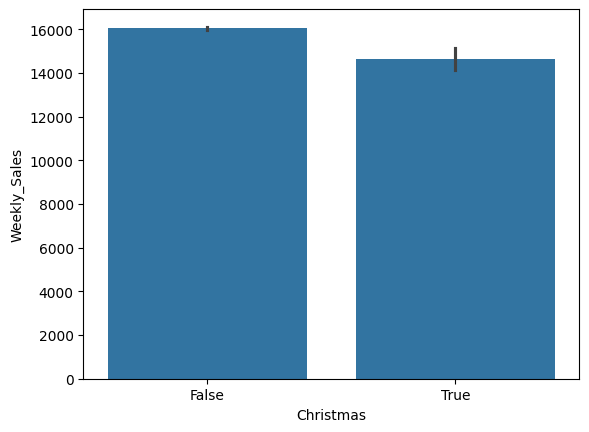

In [28]:
sns.barplot(x='Christmas', y='Weekly_Sales', data=df) # Christmas holiday vs not-Christmas

Penjualan mingguan justru menurun pada hari natal. Ini mungkin karena toko tutup.

<Axes: xlabel='Thanksgiving', ylabel='Weekly_Sales'>

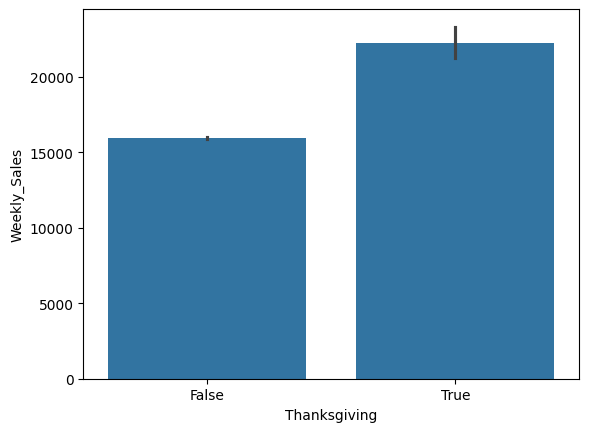

In [29]:
sns.barplot(x='Thanksgiving', y='Weekly_Sales', data=df) # Thanksgiving holiday vs not-thanksgiving

Penjualan mingguan naik pesat saat Thanksgiving

<Axes: xlabel='Super_Bowl', ylabel='Weekly_Sales'>

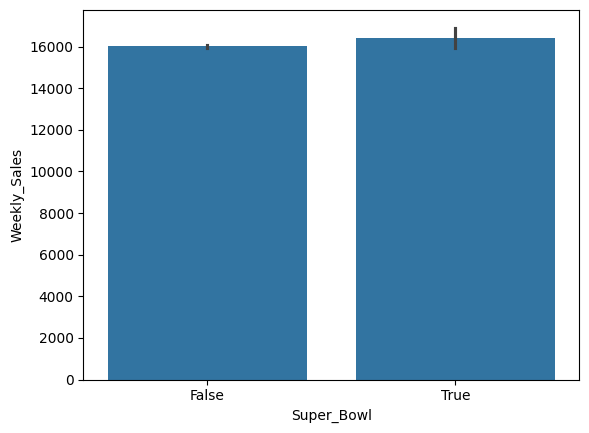

In [30]:
sns.barplot(x='Super_Bowl', y='Weekly_Sales', data=df) # Super bowl holiday vs not-super bowl

Penjualan lebih tinggi sedikit saat Super Bowl

<Axes: xlabel='Labor_Day', ylabel='Weekly_Sales'>

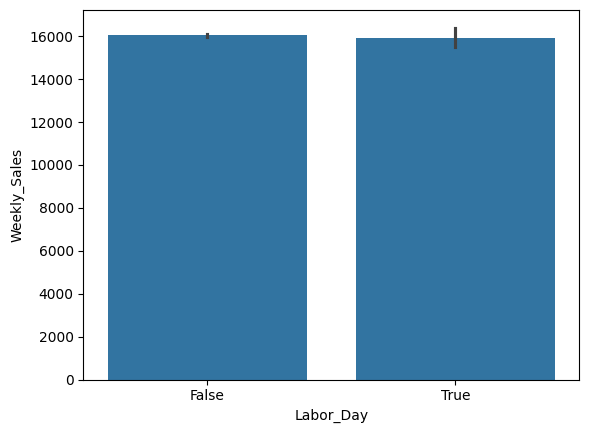

In [31]:
sns.barplot(x='Labor_Day', y='Weekly_Sales', data=df) # Labor day holiday vs not-labor day

Penjualan hampir sama (lebih banyak sedikit) saat Labor Day

Terlihat bahwa pada grafik, Hari Buruh dan Natal tidak meningkatkan penjualan rata-rata mingguan. Ada efek positif pada penjualan di Super Bowl, tetapi perbedaan tertinggi terjadi pada Thanksgiving. Saya pikir, orang-orang pada umumnya lebih suka membeli hadiah Natal 1-2 minggu sebelum Natal, jadi itu tidak mengubah penjualan di minggu Natal. Dan, ada penjualan Black Friday di minggu Thanksgiving.

# Type Effect on Holidays

Ada tiga tipe penyimpanan berbeda dalam data, yaitu A, B, dan C.

Rerata penjualan mingguan saat natal.

In [32]:
df.groupby(['Christmas','Type'])['Weekly_Sales'].mean()  # Avg weekly sales for types on Christmas

Christmas  Type
False      A       20174.350209
           B       12301.986116
           C        9570.951973
True       A       18310.167535
           B       11488.988057
           C        8031.520607
Name: Weekly_Sales, dtype: float64

Dampak Natal pada Penjualan:
1. Penurunan Penjualan:
  - Tipe A: Turun 9.2% (20,174→18,310).
  - Tipe B: Turun 6.6% (12,302→11,489).
  - Tipe C: Turun 16.1% (9,571→8,032).
2. Insight:
  - Toko Tipe C paling terdampak negatif selama Natal (penurunan terbesar).
  - Toko Tipe A relatif lebih stabil meski tetap turun.

Rerata penjualan saat Labor Day.

In [33]:
df.groupby(['Labor_Day','Type'])['Weekly_Sales'].mean()  # Avg weekly sales for types on Labor Day

Labor_Day  Type
False      A       20151.210941
           B       12294.954138
           C        9542.098293
True       A       20004.267422
           B       12084.304642
           C        9893.459258
Name: Weekly_Sales, dtype: float64

Dampak Natal pada Penjualan:
1. Penurunan Penjualan:
  - Tipe A: Turun -0.73% (20,151 -> 20,004).
  - Tipe B: Turun -1.71% (12,295	-> 12,084).
  - Tipe C: Naik 3.68% (9,542	-> 9,893).
2. Insight:
  - Tipe C: Satu-satunya tipe yang mengalami peningkatan penjualan (+3.68%) selama Labor Day.
    - Mungkin karena: Promosi khusus, lokasi toko di area wisata, atau produk terjangkau yang diburu saat liburan.
  - Tipe A & B: Penjualan cenderung stagnan/menurun sedikit.
    - Mungkin karena: Pelanggan beralih ke toko Tipe C atau mengurangi belanja di hari libur.

Rerata penjualan saat Thanksgiving

In [34]:
df.groupby(['Thanksgiving','Type'])['Weekly_Sales'].mean()  # Avg weekly sales for types on Thanksgiving

Thanksgiving  Type
False         A       20044.007801
              B       12197.717405
              C        9547.377807
True          A       27397.776346
              B       18733.973971
              C        9696.566616
Name: Weekly_Sales, dtype: float64

Dampak Natal pada Penjualan:
1. Penurunan Penjualan:
  - Tipe A: Naik 36.7% (20,044	-> 27,398).
  - Tipe B: Naik 53.6% (12,198	-> 18,734).
  - Tipe C: Naik 1.6% (9,547	-> 9,697).
2. Insight:
  - Tipe A & B: Mengalami lonjakan penjualan besar selama Thanksgiving (terutama Tipe B +53.6%).
    - Penyebab: Mungkin karena diskon Black Friday atau belanja persiapan liburan.
  - Tipe C: Hanya naik 1.6%, menunjukkan strategi promosi kurang efektif atau target pasar berbeda.

Rerata penjualan saat Super Bowl

In [35]:
df.groupby(['Super_Bowl','Type'])['Weekly_Sales'].mean()  # Avg weekly sales for types on Super Bowl

Super_Bowl  Type
False       A       20138.055908
            B       12286.739293
            C        9536.110508
True        A       20612.757674
            B       12467.035506
            C       10179.271884
Name: Weekly_Sales, dtype: float64

Dampak Natal pada Penjualan:
1. Penurunan Penjualan:
  - Tipe A: Naik 2.36% (20,138	-> 20,613).
  - Tipe B: Naik 1.46% (12,287	-> 12,467).
  - Tipe C: Naik 6.75% (9,536	-> 10,179).
2. Insight:
  - Tipe C menunjukkan respons terkuat terhadap Super Bowl (+6.75%), lebih tinggi dibandingkan tipe lain.
  - Tipe A & B: Peningkatan kecil (<3%), mungkin karena:
    - Pelanggan biasa sudah belanja tinggi.
    - Fokus belanja beralih ke produk terkait Super Bowl di Tipe C.
    
Lihat persentasi tiap tipe toko

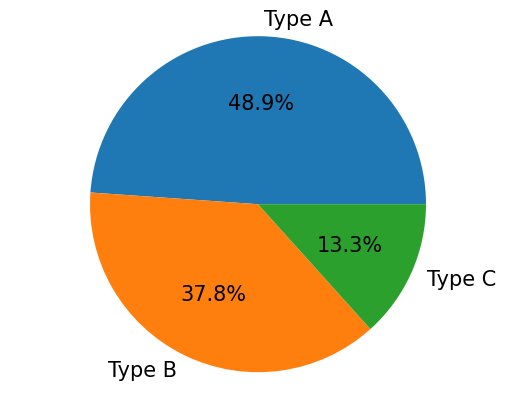

In [36]:
my_data = [48.88, 37.77 , 13.33 ]  #percentages
my_labels = 'Type A','Type B', 'Type C' # labels
plt.pie(my_data,labels=my_labels,autopct='%1.1f%%', textprops={'fontsize': 15}) #plot pie type and bigger the labels
plt.axis('equal')
mpl.rcParams.update({'font.size': 20}) #bigger percentage labels

plt.show()

### Insight Bisnis
1. Dominasi Type A:
    - Type A mungkin merupakan toko premium/lokasi strategis dengan kontribusi penjualan terbesar.
Rekomendasi: Fokuskan strategi pemasaran dan stok untuk mempertahankan performa.
2. Type B & C:
    - Type B memiliki porsi cukup besar (37.8%), tetapi Type C sangat kecil (13.3%).
4. Rekomendasi:
  - Untuk Type C: Evaluasi faktor seperti lokasi, harga, atau produk untuk meningkatkan market share.
  - Untuk Type B: Tingkatkan promosi untuk mengejar ketertinggalan dari Type A.
5. Keseimbangan Portfolio:
  - Jika tujuan adalah diversifikasi, pertimbangkan untuk menambah jumlah toko Type C di area yang kurang terjangkau Type A/B.

In [37]:
df.groupby('IsHoliday')['Weekly_Sales'].mean()

,Weekly_Sales
IsHoliday,
False,15952.816352
True,17094.300918


Hampir setengah dari toko termasuk dalam Tipe A.

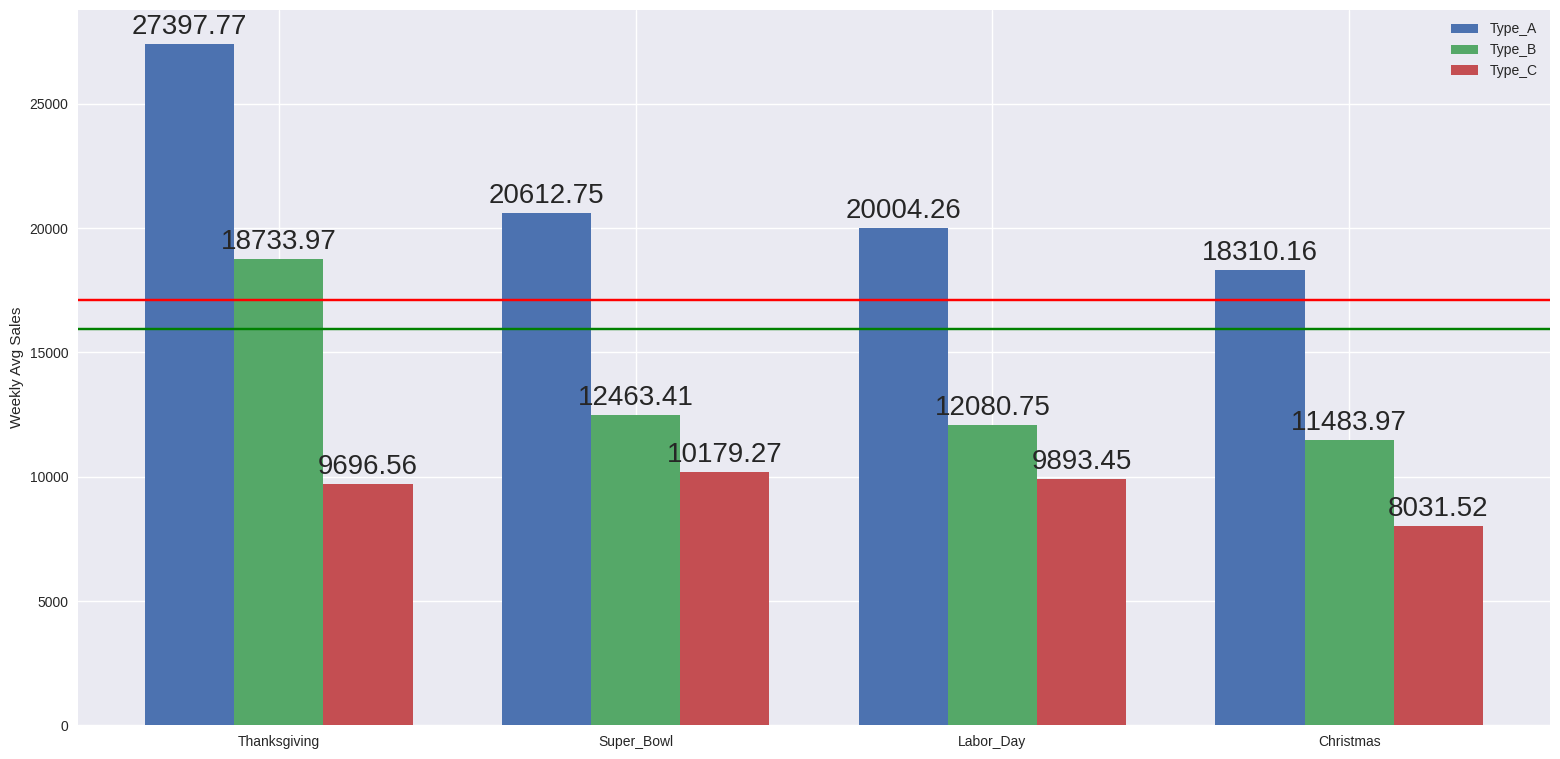

In [38]:
# Plotting avg wekkly sales according to holidays by types
plt.style.use('seaborn-v0_8')
labels = ['Thanksgiving', 'Super_Bowl', 'Labor_Day', 'Christmas']
A_means = [27397.77, 20612.75, 20004.26, 18310.16]
B_means = [18733.97, 12463.41, 12080.75, 11483.97]
C_means = [9696.56,10179.27,9893.45,8031.52]

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(16, 8))
rects1 = ax.bar(x - width, A_means, width, label='Type_A')
rects2 = ax.bar(x , B_means, width, label='Type_B')
rects3 = ax.bar(x + width, C_means, width, label='Type_C')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Weekly Avg Sales')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.axhline(y=17094.30,color='r') # holidays avg
plt.axhline(y=15952.82,color='green') # not-holiday avg

fig.tight_layout()

plt.show()

Grafik menunjukkan bahwa rata-rata penjualan tertinggi terjadi pada minggu Thanksgiving di antara hari libur. Dan, untuk semua hari libur, toko Tipe A memiliki penjualan tertinggi.

In [39]:
df.sort_values(by='Weekly_Sales',ascending=False).head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Super_Bowl,Labor_Day,Thanksgiving,Christmas
95373,10,72,2010-11-26,693099.36,True,55.33,3.162,NaN,NaN,NaN,NaN,NaN,126.669267,9.003,B,126512,False,False,True,False
338013,35,72,2011-11-25,649770.18,True,47.88,3.492,1333.24,NaN,58563.24,20.97,6386.86,140.421786,8.745,B,103681,False,False,True,False
95425,10,72,2011-11-25,630999.19,True,60.68,3.760,174.72,329.0,141630.61,79.00,1009.98,129.836400,7.874,B,126512,False,False,True,False
337961,35,72,2010-11-26,627962.93,True,46.67,3.039,NaN,NaN,NaN,NaN,NaN,136.689571,8.763,B,103681,False,False,True,False
135665,14,72,2010-11-26,474330.10,True,46.15,3.039,NaN,NaN,NaN,NaN,NaN,182.783277,8.724,A,200898,False,False,True,False


Maka tidak mengherankan bahwa 5 penjualan mingguan tertinggi adalah pada minggu Thanksgiving.

# To See the Size - Type Relation

In [40]:
df_store.groupby('Type').describe()['Size'].round(2) # See the Size-Type relation

,count,mean,std,min,25%,50%,75%,max
Type,,,,,,,,
A,22.0,177247.73,49392.62,39690.0,155840.75,202406.0,203819.0,219622.0
B,17.0,101190.71,32371.14,34875.0,93188.00,114533.0,123737.0,140167.0
C,6.0,40541.67,1304.15,39690.0,39745.00,39910.0,40774.0,42988.0


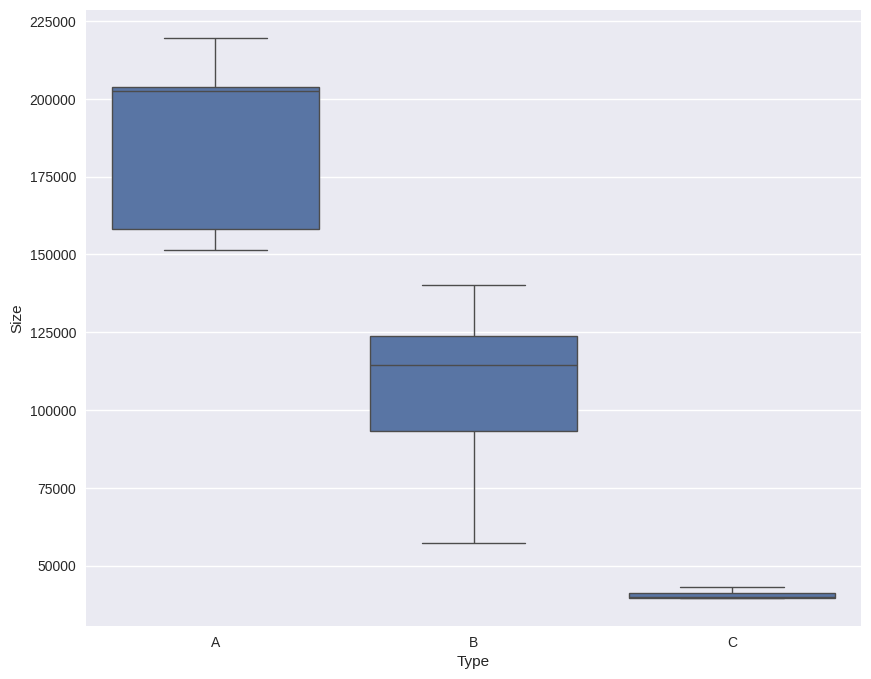

In [41]:
plt.figure(figsize=(10,8)) # To see the type-size relation
fig = sns.boxplot(x='Type', y='Size', data=df, showfliers=False)

Ukuran tipe toko konsisten dengan penjualan, seperti yang diharapkan. Toko dengan ukuran lebih besar memiliki penjualan lebih tinggi. Dan, Walmart mengklasifikasikan toko menurut ukurannya menurut grafik. Setelah nilai ukuran terkecil dari Tipe A, Tipe B dimulai. Setelah nilai ukuran terkecil dari Tipe B, Tipe C dimulai.

# Markdown Columns

Walmart menyediakan kolom markdown untuk melihat dampak markdown pada penjualan. Saat saya memeriksa kolom, ada banyak nilai NaN untuk markdown. Saya memutuskan untuk mengubahnya dengan 0, karena jika ada markdown di baris, itu akan ditampilkan dengan angka. Jadi, jika saya dapat menulis 0, itu menunjukkan tidak ada markdown pada tanggal tersebut.

In [42]:
df.isna().sum()

,0
Store,0
Dept,0
Date,0
Weekly_Sales,0
IsHoliday,0
Temperature,0
Fuel_Price,0
MarkDown1,270031
MarkDown2,309308
MarkDown3,283561


In [43]:
df = df.fillna(0) # filling null's with 0

In [44]:
df.isna().sum() # last null check

,0
Store,0
Dept,0
Date,0
Weekly_Sales,0
IsHoliday,0
Temperature,0
Fuel_Price,0
MarkDown1,0
MarkDown2,0
MarkDown3,0


In [45]:
df.describe() # to see weird statistical things

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000
mean,22.195611,44.241309,16033.114591,60.090599,3.360890,2590.323565,878.905242,468.845949,1083.534361,1662.805002,171.212496,7.960000,136749.732787
std,12.787236,30.508819,22729.492116,18.447857,0.458519,6053.415601,5076.928566,5534.069859,3896.068938,4206.209357,39.162445,1.863879,60993.084568
min,1.000000,1.000000,0.010000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2120.130000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7661.700000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.350989,7.866000,140167.000000
75%,33.000000,74.000000,20271.265000,74.280000,3.738000,2809.050000,2.400000,4.540000,425.290000,2168.040000,212.445487,8.567000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


Nilai minimum untuk penjualan mingguan adalah 0,01. Kemungkinan besar, nilai ini tidak benar, tetapi saya lebih suka tidak mengubahnya sekarang. Sebab, ada banyak departemen dan banyak toko. Memerlukan waktu yang lama untuk memeriksa setiap departemen untuk setiap toko (45 toko untuk 81 departemen). Jadi, saya mengambil rata-rata untuk EDA.

# Deeper Look in Sales

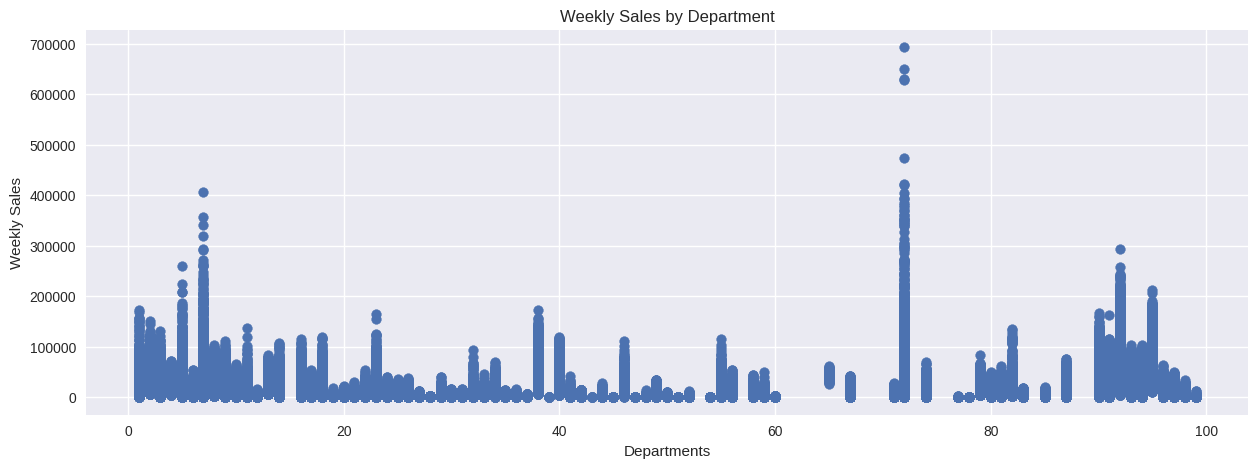

In [46]:
x = df['Dept']
y = df['Weekly_Sales']
plt.figure(figsize=(15,5))
plt.title('Weekly Sales by Department')
plt.xlabel('Departments')
plt.ylabel('Weekly Sales')
plt.scatter(x,y)
plt.show()

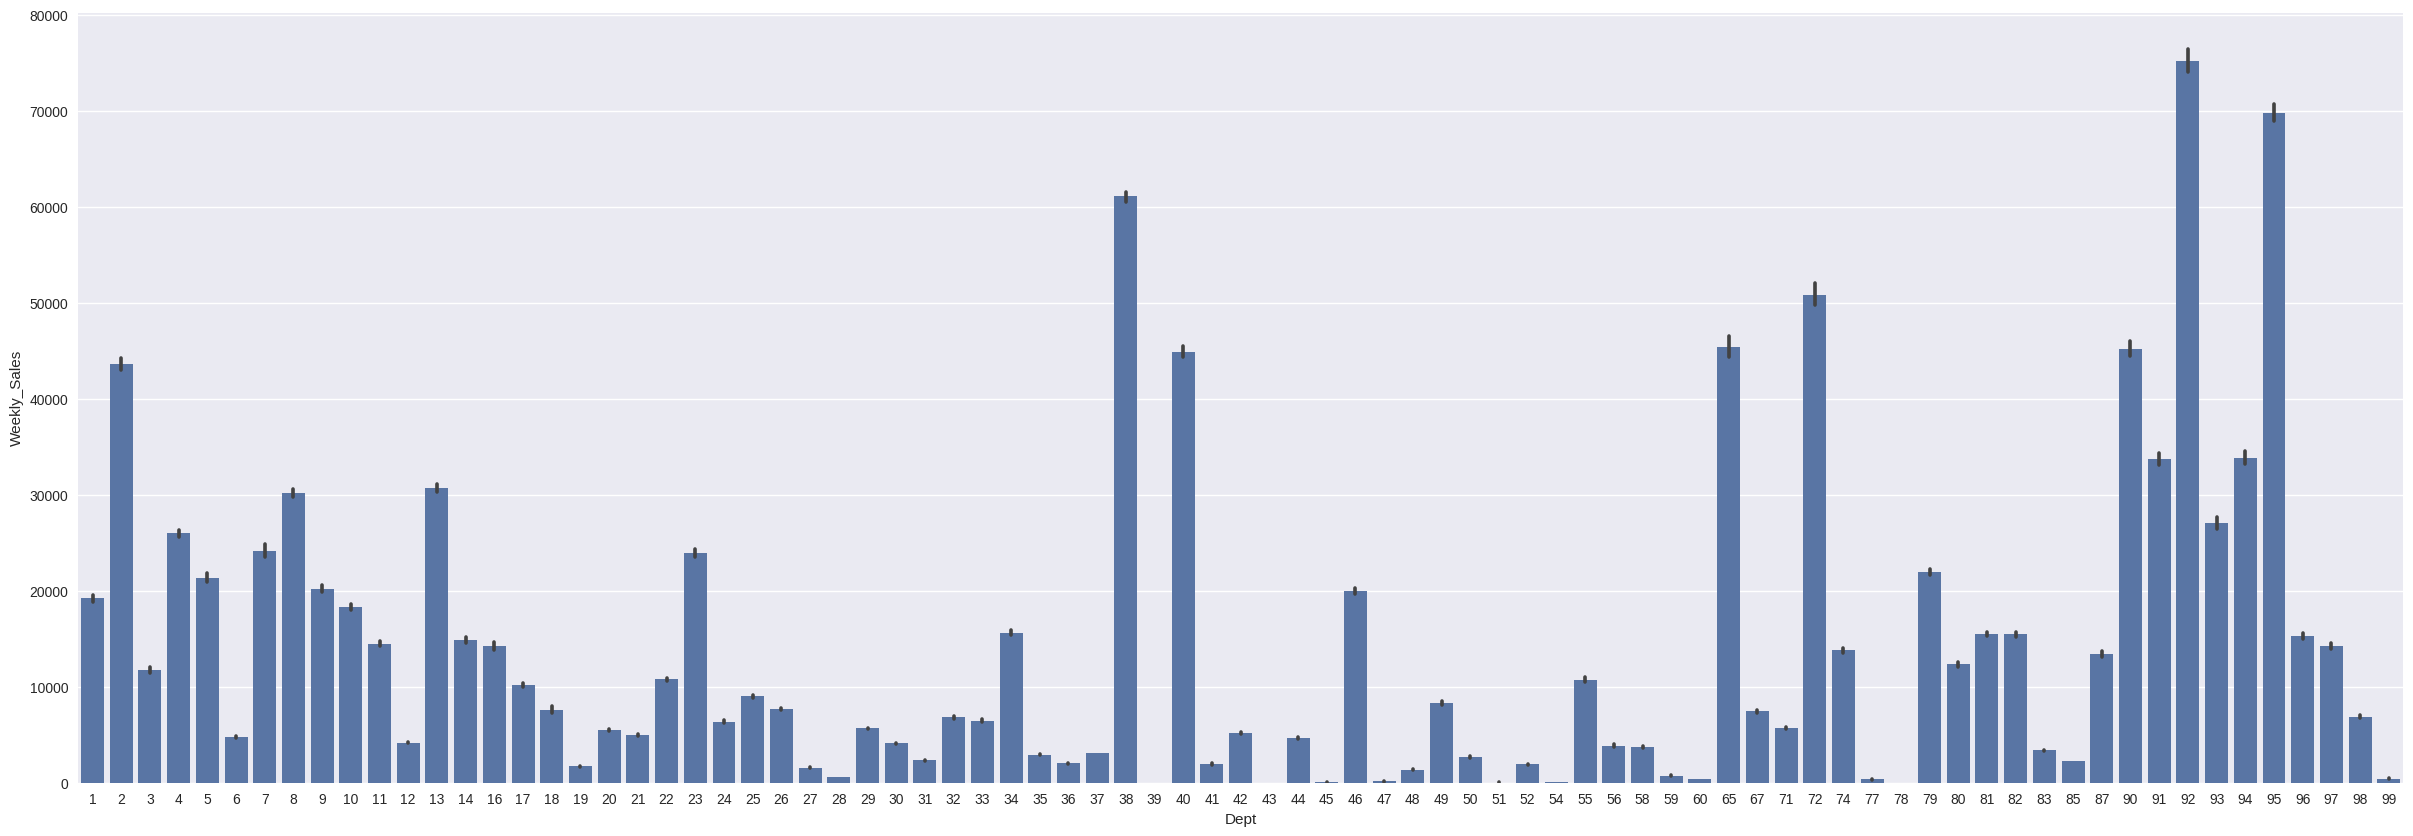

In [47]:
plt.figure(figsize=(30,10))
fig = sns.barplot(x='Dept', y='Weekly_Sales', data=df)

Dari grafik pertama, terlihat bahwa satu departemen antara 60-80 (saya berasumsi 72), memiliki nilai penjualan yang lebih tinggi. Namun, ketika kita mengambil rata-rata, terlihat bahwa departemen 92 memiliki penjualan rata-rata yang lebih tinggi. Menurut saya, departemen 72 adalah departemen musiman. Nilainya lebih tinggi di beberapa musim, tetapi rata-rata 92 lebih tinggi.

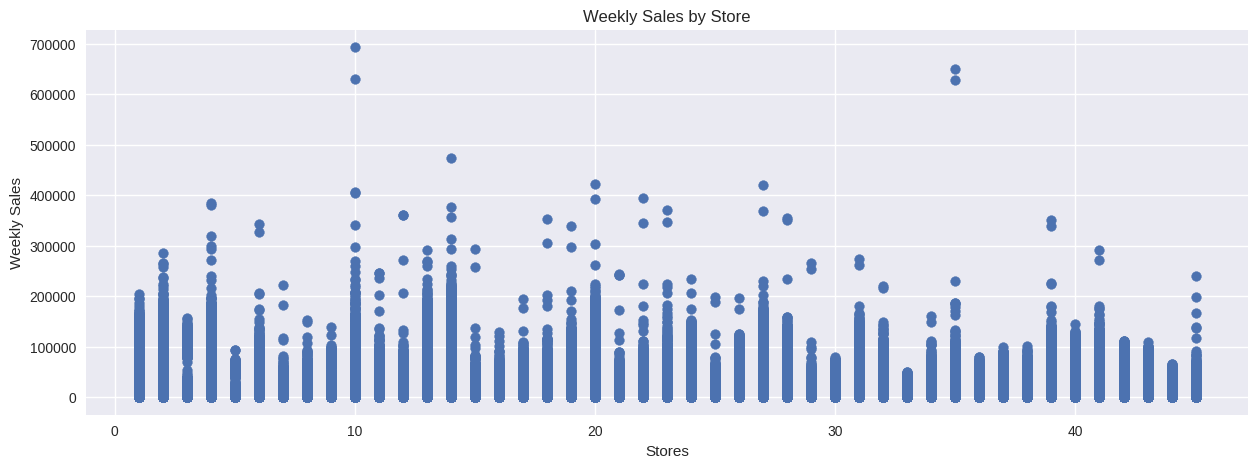

In [48]:
x = df['Store']
y = df['Weekly_Sales']
plt.figure(figsize=(15,5))
plt.title('Weekly Sales by Store')
plt.xlabel('Stores')
plt.ylabel('Weekly Sales')
plt.scatter(x,y)
plt.show()

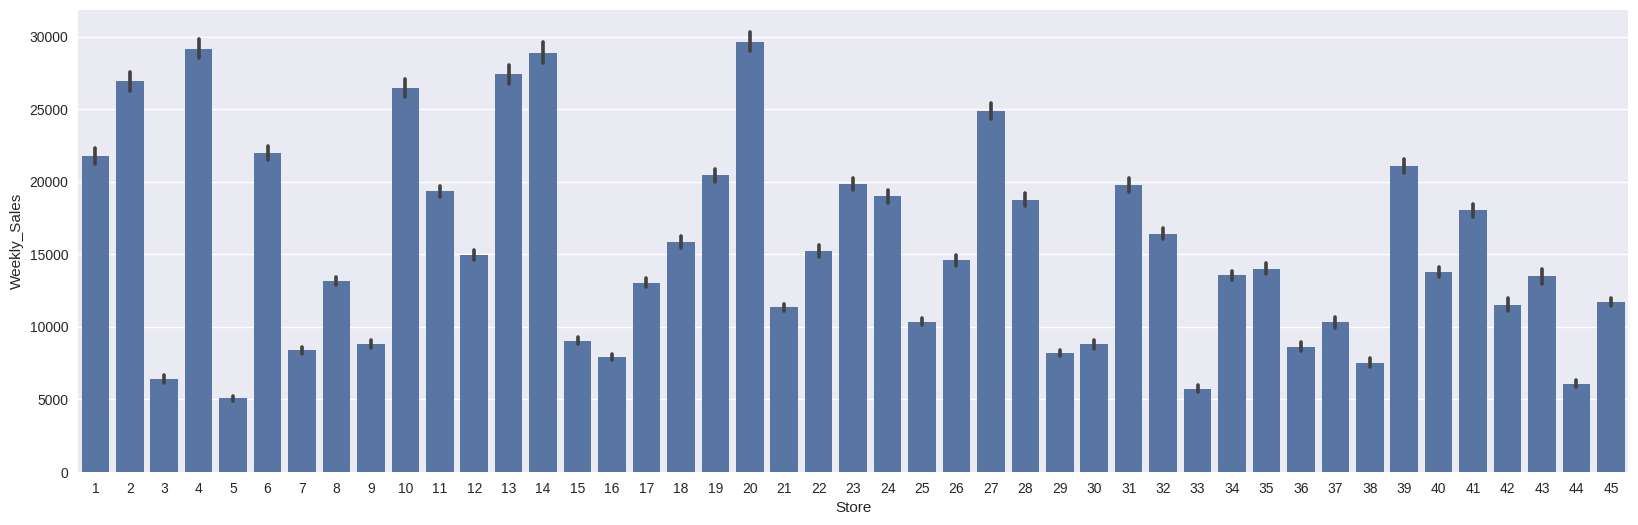

In [49]:
plt.figure(figsize=(20,6))
fig = sns.barplot(x='Store', y='Weekly_Sales', data=df)

Hal yang sama terjadi di toko-toko. Dari grafik pertama, beberapa toko memiliki penjualan yang lebih tinggi tetapi secara rata-rata toko ke-20 adalah yang terbaik dan 4 dan 14 mengikutinya.

# Changing Date to Datetime and Creating New Columns

In [50]:
df["Date"] = pd.to_datetime(df["Date"]) # convert to datetime
df['week'] = df['Date'].dt.isocalendar().week
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year

In [51]:
df.groupby('month')['Weekly_Sales'].mean() # to see the best months for sales

,Weekly_Sales
month,
1,14182.239153
2,16048.701191
3,15464.817698
4,15696.435193
5,15845.556200
6,16397.605478
7,15905.472425
8,16113.800069
9,15147.216063


In [52]:
df.groupby('year')['Weekly_Sales'].mean() # to see the best years for sales

,Weekly_Sales
year,
2010,16318.648285
2011,16007.797985
2012,15748.265005


<Axes: xlabel='month'>

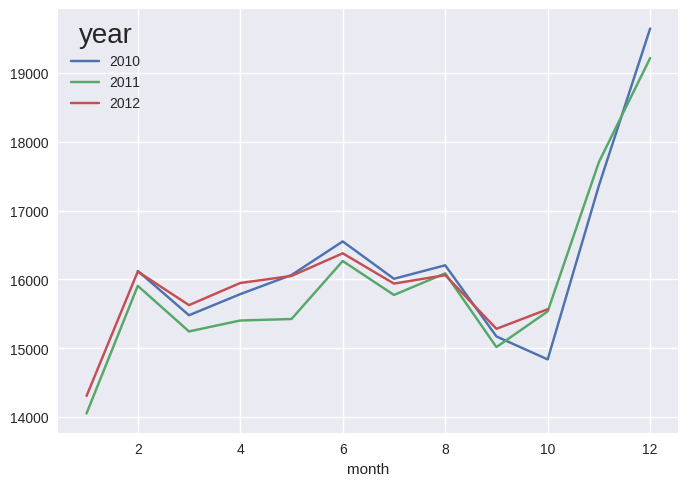

In [53]:
monthly_sales = pd.pivot_table(df, values = "Weekly_Sales", columns = "year", index = "month")
monthly_sales.plot()

Dari grafik, terlihat bahwa penjualan pada tahun 2011 lebih rendah daripada penjualan pada tahun 2010 secara umum. Ketika kita melihat penjualan rata-rata, terlihat bahwa penjualan pada tahun 2010 memiliki nilai yang lebih tinggi, tetapi penjualan pada tahun 2012 tidak memiliki informasi mengenai penjualan pada bulan November dan Desember yang lebih tinggi. Meskipun penjualan pada tahun 2012 tidak memiliki penjualan selama dua bulan terakhir, rata-rata penjualannya mendekati penjualan pada tahun 2010. Kemungkinan besar, penjualan pada tahun 2012 akan menempati posisi pertama jika kita memperoleh hasil penjualan pada tahun 2012 dan menambahkannya.

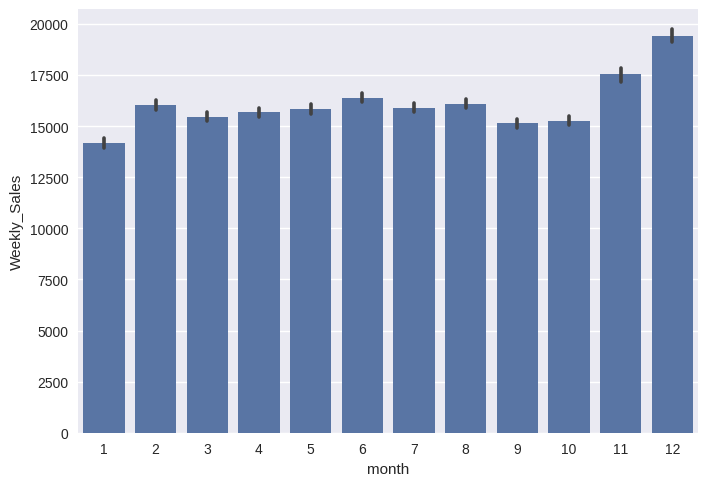

In [54]:
fig = sns.barplot(x='month', y='Weekly_Sales', data=df)

Bila kita melihat grafik di atas, penjualan terbaik terjadi pada bulan Desember dan November, seperti yang diharapkan. Nilai tertinggi terjadi pada hari libur Thanksgiving, tetapi bila kita mengambil rata-rata, jelaslah bahwa Desember memiliki nilai terbaik.

In [55]:
df.groupby('week')['Weekly_Sales'].mean().sort_values(ascending=False).head()

,Weekly_Sales
week,
51,26454.164116
47,22269.601768
50,20478.421134
49,18731.794840
22,16856.650245


Rata-rata penjualan 5 teratas tiap minggu terjadi pada 1-2 minggu sebelum Natal, Thanksgiving, Black Friday, dan akhir Mei, saat sekolah tutup.

<Axes: xlabel='week'>

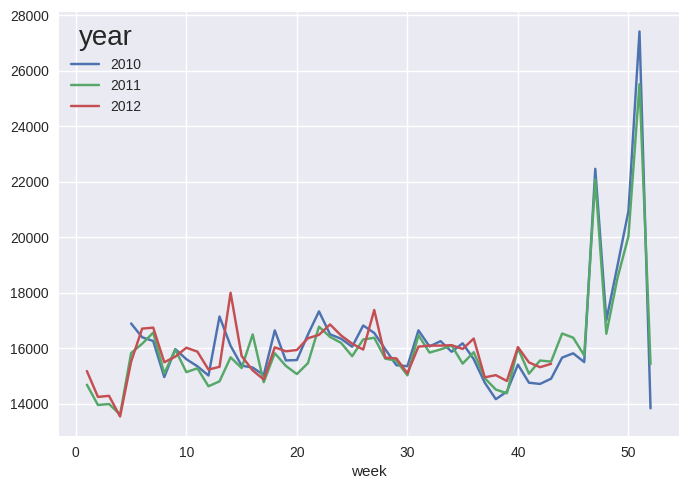

In [56]:
weekly_sales = pd.pivot_table(df, values = "Weekly_Sales", columns = "year", index = "week")
weekly_sales.plot()

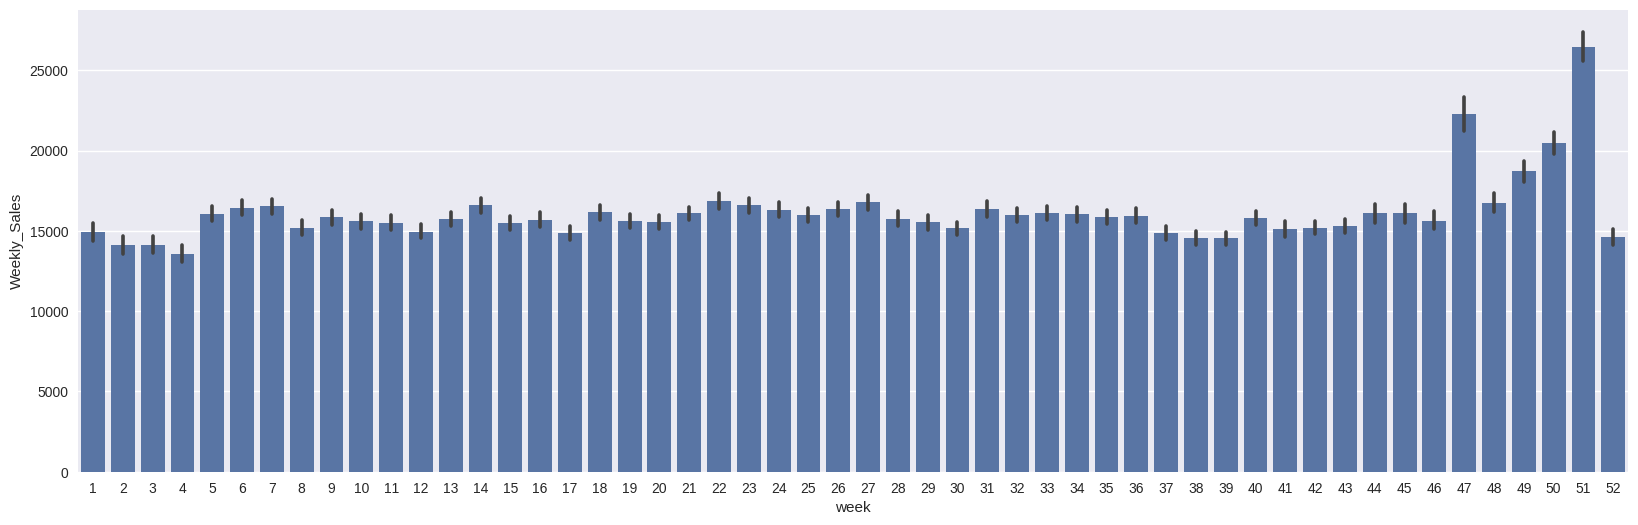

In [57]:
plt.figure(figsize=(20,6))
fig = sns.barplot(x='week', y='Weekly_Sales', data=df)

Dari grafik, terlihat bahwa minggu ke-51 dan minggu ke-47 memiliki rata-rata yang jauh lebih tinggi sebagai efek Natal, Thanksgiving, dan Black Friday.

# Fuel Price, CPI , Unemployment , Temperature Effects

<Axes: xlabel='Fuel_Price'>

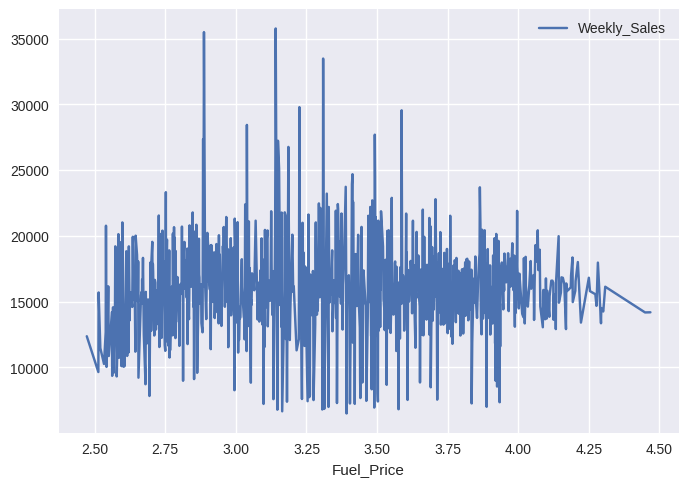

In [58]:
fuel_price = pd.pivot_table(df, values = "Weekly_Sales", index= "Fuel_Price")
fuel_price.plot()

<Axes: xlabel='Temperature'>

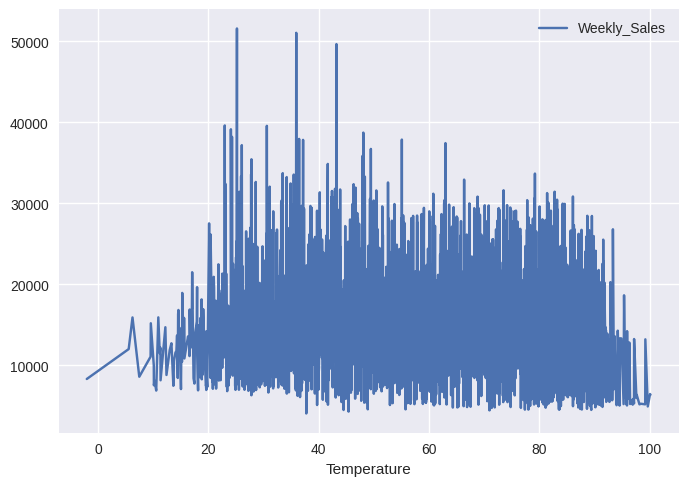

In [59]:
temp = pd.pivot_table(df, values = "Weekly_Sales", index= "Temperature")
temp.plot()

<Axes: xlabel='CPI'>

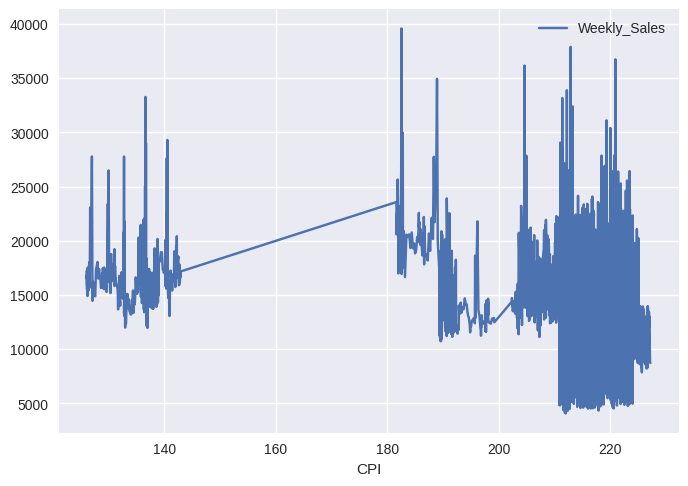

In [60]:
CPI = pd.pivot_table(df, values = "Weekly_Sales", index= "CPI")
CPI.plot()

<Axes: xlabel='Unemployment'>

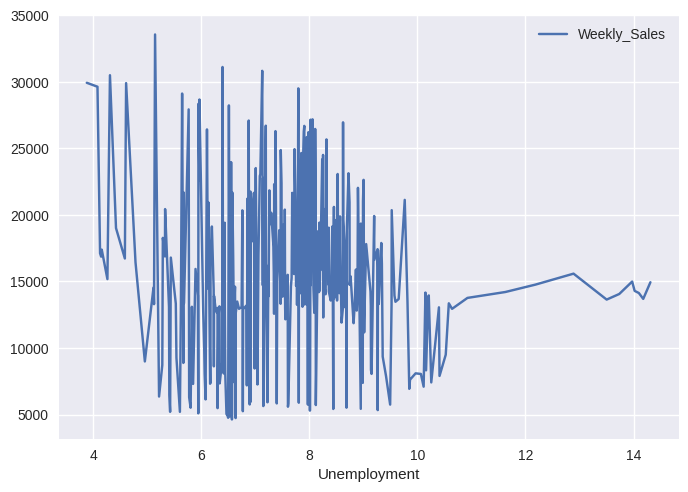

In [61]:
unemployment = pd.pivot_table(df, values = "Weekly_Sales", index= "Unemployment")
unemployment.plot()

Dari grafik, terlihat bahwa tidak ada pola yang signifikan antara CPI, suhu, tingkat pengangguran, harga bahan bakar vs penjualan mingguan. Tidak ada data untuk CPI antara 140-180 juga.

In [62]:
df.to_csv('clean_data.csv') # assign new data frame to csv for using after here

# Findings and Explorations

# Cleaning Process

- Data tidak memiliki terlalu banyak nilai yang hilang. Semua kolom telah diperiksa.
- Saya memilih baris yang memiliki penjualan mingguan lebih dari 0. Nilai minus adalah 0,3% dari data. Jadi, saya membuangnya.
- Nilai nol dalam penurunan harga diubah menjadi nol. Sebab, nilai tersebut ditulis sebagai nol jika tidak ada penurunan harga pada departemen ini.

# Explorations & Findings

- Ada 45 toko dan 81 departemen dalam data. Departemen tidak sama di semua toko.
- Meskipun departemen 72 memiliki nilai penjualan mingguan yang lebih tinggi, rata-rata departemen 92 adalah yang terbaik. Ini menunjukkan kepada kita, beberapa departemen memiliki nilai yang lebih tinggi seperti musiman seperti Thanksgiving. Ini konsisten ketika kita melihat 5 penjualan teratas dalam data, semuanya termasuk dalam departemen ke-72 pada waktu liburan Thanksgiving.
- Meskipun toko 10 dan 35 terkadang memiliki nilai penjualan mingguan yang lebih tinggi, secara umum rata-rata toko 20 dan toko 4 berada di peringkat pertama dan kedua. Ini berarti bahwa beberapa area memiliki penjualan musiman yang lebih tinggi.
- Toko memiliki 3 jenis sebagai A, B dan C menurut ukurannya. Hampir setengah dari toko lebih besar dari 150000 dan dikategorikan sebagai A. Menurut jenisnya, penjualan toko berubah.
- Seperti yang diharapkan, penjualan rata-rata liburan lebih tinggi dari tanggal normal.
- Liburan Natal diperkenalkan sebagai hari-hari terakhir tahun ini. Tetapi orang-orang umumnya berbelanja di minggu ke-51. Jadi, ketika kita melihat total penjualan hari libur, Thanksgiving memiliki penjualan tertinggi di antara keduanya yang ditetapkan oleh Walmart.
- Tahun 2010 memiliki penjualan lebih tinggi daripada tahun 2011 dan 2012. Namun, penjualan November dan Desember tidak ada dalam data untuk tahun 2012. Bahkan tanpa bulan penjualan tertinggi, tahun 2012 tidak jauh lebih rendah daripada tahun 2010, jadi setelah menambahkan dua bulan terakhir, tahun 2012 dapat menjadi yang pertama.
- Terlihat jelas bahwa minggu ke-51 dan ke-47 memiliki nilai yang lebih tinggi dan minggu ke-50-48 mengikutinya. Menariknya, penjualan teratas ke-5 terjadi pada minggu ke-22 tahun ini. Hasil ini menunjukkan bahwa Natal, Thanksgiving, dan Black Friday sangat penting daripada minggu-minggu lainnya untuk penjualan dan waktu penting ke-5 adalah minggu ke-22 tahun ini dan merupakan akhir Mei, saat sekolah ditutup. Kemungkinan besar, orang-orang sedang mempersiapkan liburan di akhir Mei.
- Penjualan Januari jauh lebih sedikit daripada bulan-bulan lainnya. Ini adalah hasil dari penjualan tinggi pada bulan November dan Desember. Setelah dua bulan penjualan tinggi, orang lebih suka membayar lebih sedikit pada bulan Januari.
- CPI, suhu, tingkat pengangguran, dan harga bahan bakar tidak memiliki pola pada penjualan mingguan.

# First Trial with Random Forest

Secara umum, Rondom Forest Regressor memberikan hasil yang baik jika kita menyetelnya dengan baik. Jadi, untuk menemukan model dasar yang sederhana, saya akan menggunakan RandomForestRegressor di buku catatan ini. Selain itu, pentingnya fitur untuk model dapat ditemukan di buku catatan ini.

Metrik kami untuk proyek ini adalah Weighted Mean Absolute Error (WMAE):

$$
WMAE = \frac{1}{\sum w} \sum^{h}_{i=1}w|y_i - \hat{y}_i|
$$

Model akan semakin baik jika nilai WMAE semakin kecil.

di mana

- $n$ adalah jumlah baris
- $\hat{y}_i$ adalah penjualan yang diprediksi
- $y_i$ adalah penjualan aktual
- $w_i$ adalah bobot. $w = 5$ jika minggu tersebut adalah minggu libur, 1 jika tidak

Dengan metrik ini, kesalahan pada minggu libur memiliki bobot 5 kali lebih besar daripada minggu normal. Jadi, lebih penting untuk memprediksi penjualan pada minggu libur secara akurat. Semua hasil untuk uji coba dapat ditemukan di akhir buku catatan ini.

In [63]:
pd.options.display.max_columns=100 # to see columns

In [64]:
df = pd.read_csv('./clean_data.csv')

In [65]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [66]:
df['Date'] = pd.to_datetime(df['Date']) # changing datetime to divide if needs

# Encoding the Data

Untuk praproses data kita, saya akan mengubah nilai boolean hari libur menjadi 0-1 dan mengganti jenis toko dari A, B, C menjadi 1, 2, 3.

In [67]:
df_encoded = df.copy() # to keep original dataframe taking copy of it

In [68]:
type_group = {'A':1, 'B': 2, 'C': 3}  # changing A,B,C to 1-2-3
df_encoded['Type'] = df_encoded['Type'].replace(type_group)

In [69]:
df_encoded['Super_Bowl'] = df_encoded['Super_Bowl'].astype(bool).astype(int) # changing T,F to 0-1

In [70]:
df_encoded['Thanksgiving'] = df_encoded['Thanksgiving'].astype(bool).astype(int) # changing T,F to 0-1

In [71]:
df_encoded['Labor_Day'] = df_encoded['Labor_Day'].astype(bool).astype(int) # changing T,F to 0-1

In [72]:
df_encoded['Christmas'] = df_encoded['Christmas'].astype(bool).astype(int) # changing T,F to 0-1

In [73]:
df_encoded['IsHoliday'] = df_encoded['IsHoliday'].astype(bool).astype(int) # changing T,F to 0-1

In [74]:
df_new = df_encoded.copy() # taking the copy of encoded df to keep it original

# Observation of Interactions between Features

Pertama, saya akan menghilangkan kolom hari libur yang terbagi dari data saya dan mencoba menghilangkannya. Untuk menjaga data yang dikodekan tetap aman, saya menetapkan kerangka data saya ke yang baru dan akan saya gunakan untuk ini.

In [75]:
drop_col = ['Super_Bowl','Labor_Day','Thanksgiving','Christmas']
df_new.drop(drop_col, axis=1, inplace=True) # dropping columns

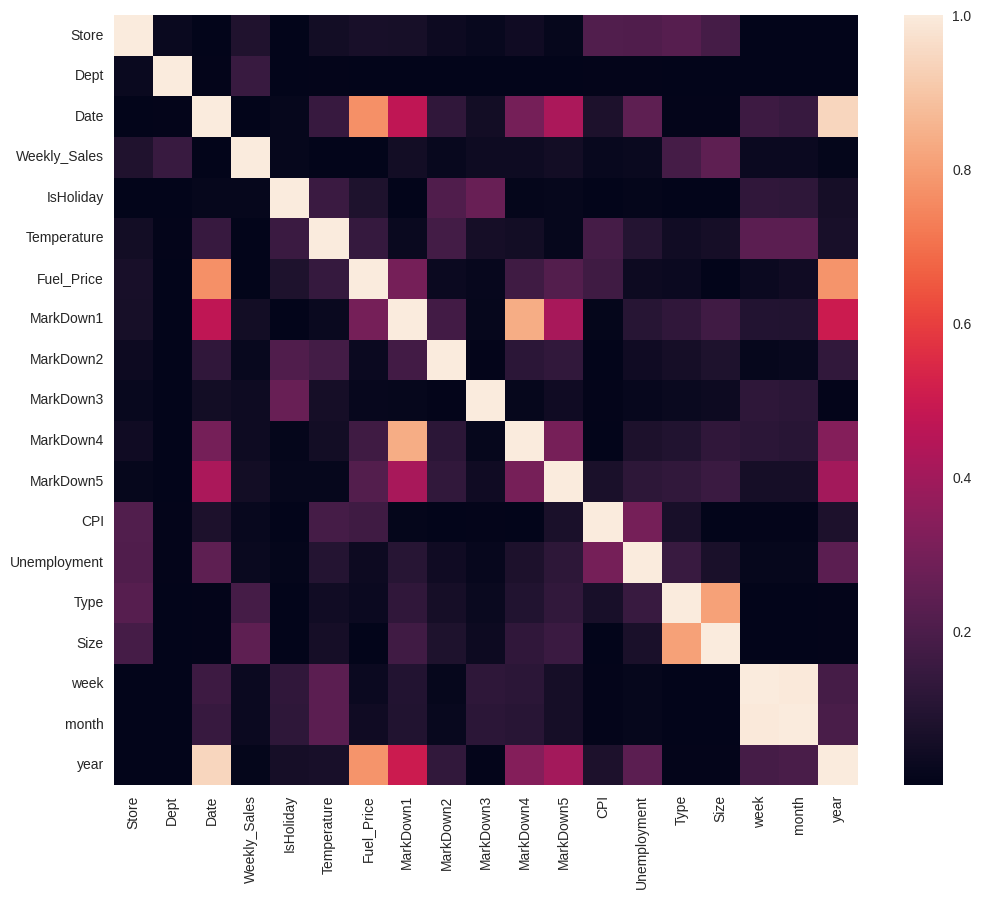

In [76]:
plt.figure(figsize = (12,10))
sns.heatmap(df_new.corr().abs())    # To see the correlations
plt.show()

Suhu, pengangguran, CPI tidak memiliki pengaruh signifikan terhadap penjualan mingguan, jadi saya akan menghilangkannya. Selain itu, Markdown 4 dan 5 sangat berkorelasi dengan Markdown 1. Jadi, saya akan menghilangkannya juga. Mungkin itu dapat menimbulkan masalah multikolinearitas. Jadi, pertama-tama saya akan mencoba tanpa keduanya.

In [77]:
drop_col = ['Temperature','MarkDown4','MarkDown5','CPI','Unemployment']
df_new.drop(drop_col, axis=1, inplace=True) # dropping columns

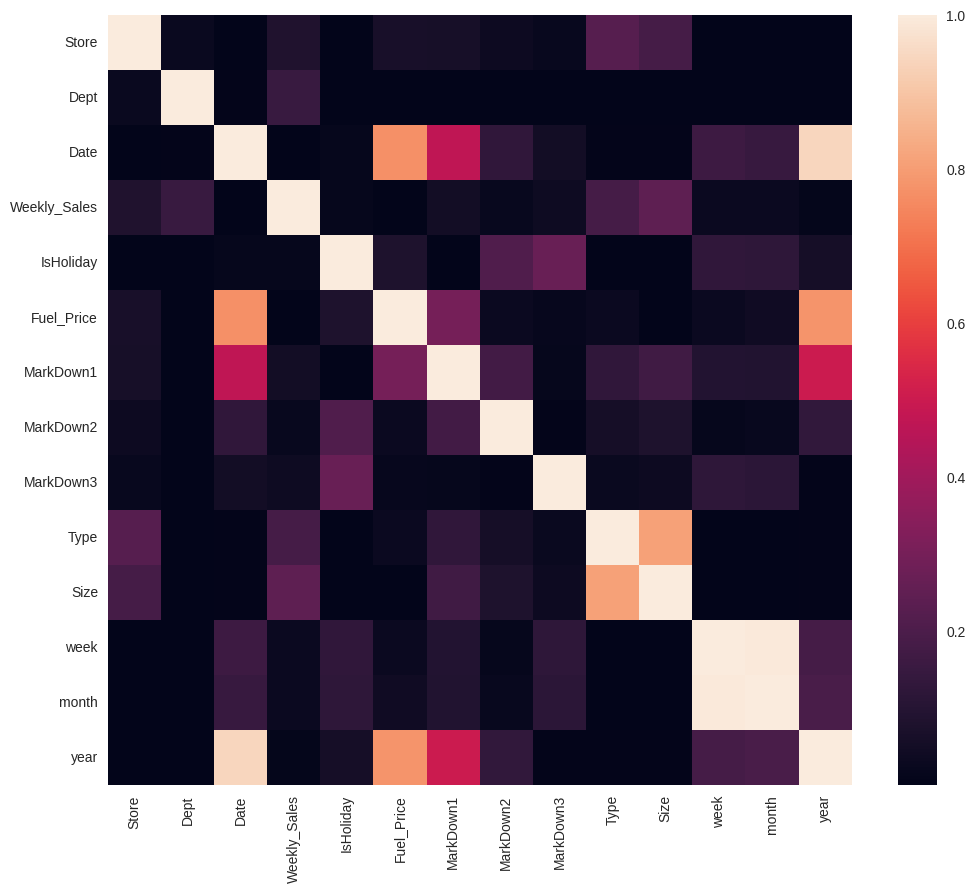

In [78]:
plt.figure(figsize = (12,10))
sns.heatmap(df_new.corr().abs())    # To see the correlations without dropping columns
plt.show()

Ukuran dan jenis sangat berkorelasi dengan penjualan mingguan. Selain itu, departemen dan toko berkorelasi dengan penjualan.

In [79]:
df_new = df_new.sort_values(by='Date', ascending=True) # sorting according to date

# Creating Train-Test Splits

Kolom tanggal kami memiliki nilai berkesinambungan, untuk menjaga agar fitur tanggal tetap berkelanjutan, saya tidak akan melakukan pemisahan acak. Jadi, saya membagi data secara manual sebesar 70%.

In [80]:
train_data = df_new[:int(0.7*(len(df_new)))] # taking train part
test_data = df_new[int(0.7*(len(df_new))):] # taking test part

target = "Weekly_Sales"
used_cols = [c for c in df_new.columns.to_list() if c not in [target]] # all columns except weekly sales

X_train = train_data[used_cols]
X_test = test_data[used_cols]
y_train = train_data[target]
y_test = test_data[target]

In [81]:
X = df_new[used_cols] # to keep train and test X values together

Kami memiliki cukup informasi pada tanggal seperti minggu dalam setahun. Jadi, saya hilangkan kolom tanggal.

In [82]:
X_train = X_train.drop(['Date'], axis=1) # dropping date from train
X_test = X_test.drop(['Date'], axis=1) # dropping date from test

# Metric Definition Function

Metrik kami tidak dihitung secara default dari model yang sudah ada. Ini adalah kesalahan yang ditimbang, jadi saya akan menggunakan fungsi di bawah ini untuk menghitungnya.

In [83]:
def wmae_test(test, pred): # WMAE for test
    weights = X_test['IsHoliday'].apply(lambda is_holiday:5 if is_holiday else 1)
    error = np.sum(weights * np.abs(test - pred), axis=0) / np.sum(weights)
    return error

# Random Forest Regressor

Untuk menyetel regressor, saya dapat menggunakan gridsearch tetapi butuh waktu lama untuk jenis data ini yang memiliki banyak baris dan kolom. Jadi, saya memilih parameter regressor secara manual. Saya mengubah parameter setiap kali dan mencoba menemukan hasil terbaik.

In [84]:
rf = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1, max_depth=35,
                           max_features = 'sqrt',min_samples_split = 10)

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()



#making pipe tp use scaler and regressor together
pipe = make_pipeline(scaler,rf)

pipe.fit(X_train, y_train)

# predictions on train set
y_pred = pipe.predict(X_train)

# predictions on test set
y_pred_test = pipe.predict(X_test)

In [85]:
wmae_test(y_test, y_pred_test)

5697.712824122053

Untuk percobaan pertama, kesalahan tertimbang saya sekitar 5897.

# To See Feature Importance

In [86]:
X = X.drop(['Date'], axis=1) #dropping date column from X

Sel kode di bawah ini diambil dari buku catatan instruktur kami Bryan Arnold. Saya mengubah kode sesuai data saya dan melihat plotnya.

Feature ranking:
1. feature 1 (0.734834)
2. feature 8 (0.103608)
3. feature 0 (0.058842)
4. feature 7 (0.039401)
5. feature 9 (0.021299)
6. feature 3 (0.018655)
7. feature 10 (0.008636)
8. feature 6 (0.005390)
9. feature 4 (0.003045)
10. feature 5 (0.002715)
11. feature 2 (0.002032)
12. feature 11 (0.001543)


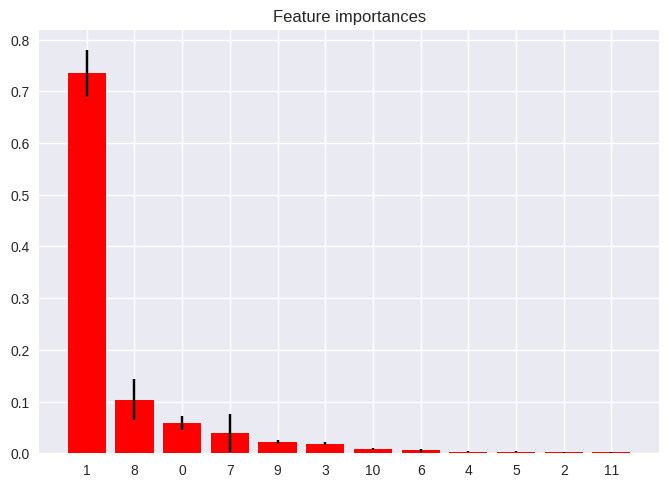

In [87]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Printing the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plotting the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

Setelah melihat pentingnya fitur, saya menghilangkan 3-4 fitur yang paling tidak penting dan mencoba model tersebut. Saya menemukan hasil terbaik ketika saya menghilangkan kolom bulan yang sangat berkorelasi dengan minggu.

In [88]:
X1_train = X_train.drop(['month'], axis=1) # dropping month
X1_test = X_test.drop(['month'], axis=1)

# Model Again without Month

In [89]:
rf = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1, max_depth=35,
                           max_features = 'sqrt',min_samples_split = 10)

scaler=RobustScaler()
pipe = make_pipeline(scaler,rf)

pipe.fit(X1_train, y_train)

# predictions on train set
y_pred = pipe.predict(X1_train)

# predictions on test set
y_pred_test = pipe.predict(X1_test)

In [90]:
wmae_test(y_test, y_pred_test)

5450.408821519322

Memberikan hasil lebih baik daripada hasil dasar.

# Model with Whole Data

Sekarang, saya ingin memastikan bahwa model saya akan belajar dari kolom yang saya hilangkan atau tidak. Jadi, saya akan menerapkan model saya ke seluruh data yang dikodekan lagi.

In [91]:
# splitting train-test to whole dataset
train_data_enc = df_encoded[:int(0.7*(len(df_encoded)))]
test_data_enc = df_encoded[int(0.7*(len(df_encoded))):]

target = "Weekly_Sales"
used_cols1 = [c for c in df_encoded.columns.to_list() if c not in [target]] # all columns except price

X_train_enc = train_data_enc[used_cols1]
X_test_enc = test_data_enc[used_cols1]
y_train_enc = train_data_enc[target]
y_test_enc = test_data_enc[target]

In [92]:
X_enc = df_encoded[used_cols1] # to get together train,test splits

In [93]:
X_enc = X_enc.drop(['Date'], axis=1) #dropping date column for whole X

In [94]:
X_train_enc = X_train_enc.drop(['Date'], axis=1) # dropping date from train and test
X_test_enc= X_test_enc.drop(['Date'], axis=1)

In [95]:
rf = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1, max_depth=35,
                           max_features = 'sqrt',min_samples_split = 10)

scaler=RobustScaler()
pipe = make_pipeline(scaler,rf)

pipe.fit(X_train_enc, y_train_enc)

# predictions on train set
y_pred_enc = pipe.predict(X_train_enc)

# predictions on test set
y_pred_test_enc = pipe.predict(X_test_enc)

In [96]:
wmae_test(y_test_enc, y_pred_test_enc)

2660.585435168574

Kami menemukan hasil yang lebih baik untuk keseluruhan data, artinya model kami dapat belajar dari kolom yang saya hilangkan sebelumnya.

# Feature Importance for Whole Encoded Dataset

Feature ranking:
1. feature 1 (0.740225)
2. feature 13 (0.074453)
3. feature 12 (0.041055)
4. feature 0 (0.033746)
5. feature 10 (0.030454)
6. feature 11 (0.017543)
7. feature 18 (0.012157)
8. feature 3 (0.011184)
9. feature 4 (0.010293)
10. feature 19 (0.005989)
11. feature 7 (0.004640)
12. feature 9 (0.004178)
13. feature 8 (0.003567)
14. feature 5 (0.003513)
15. feature 6 (0.002597)
16. feature 20 (0.001178)
17. feature 16 (0.001030)
18. feature 2 (0.000953)
19. feature 17 (0.000670)
20. feature 15 (0.000303)
21. feature 14 (0.000275)


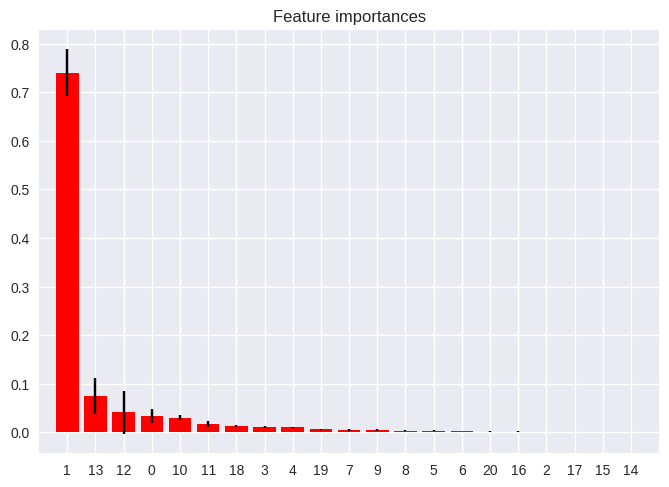

In [97]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Printing the feature ranking
print("Feature ranking:")

for f in range(X_enc.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plotting the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_enc.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_enc.shape[1]), indices)
plt.xlim([-1, X_enc.shape[1]])
plt.show()

Berdasarkan kepentingan fitur, saya menghilangkan beberapa kolom dari keseluruhan rangkaian dan mencoba model saya lagi.

In [98]:
df_encoded_new = df_encoded.copy() # taking copy of encoded data to keep it without change.
df_encoded_new.drop(drop_col, axis=1, inplace=True)

# Model According to Feature Importance

In [99]:
#train-test splitting
train_data_enc_new = df_encoded_new[:int(0.7*(len(df_encoded_new)))]
test_data_enc_new = df_encoded_new[int(0.7*(len(df_encoded_new))):]

target = "Weekly_Sales"
used_cols2 = [c for c in df_encoded_new.columns.to_list() if c not in [target]] # all columns except price

X_train_enc1 = train_data_enc_new[used_cols2]
X_test_enc1 = test_data_enc_new[used_cols2]
y_train_enc1 = train_data_enc_new[target]
y_test_enc1 = test_data_enc_new[target]

#droping date from train-test
X_train_enc1 = X_train_enc1.drop(['Date'], axis=1)
X_test_enc1= X_test_enc1.drop(['Date'], axis=1)

In [100]:
rf = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1, max_depth=40,
                           max_features = 'log2',min_samples_split = 10)

scaler=RobustScaler()
pipe = make_pipeline(scaler,rf)

pipe.fit(X_train_enc1, y_train_enc1)

# predictions on train set
y_pred_enc = pipe.predict(X_train_enc1)

# predictions on test set
y_pred_test_enc = pipe.predict(X_test_enc1)

In [101]:
pipe.score(X_test_enc1,y_test_enc1)

0.735025800467954

In [102]:
wmae_test(y_test_enc1, y_pred_test_enc)

2018.8987478432969

Saya menemukan hasil terbaik dengan melakukan pemilihan fitur dari seluruh kumpulan data yang dikodekan.

# Model with Dropping Month Column

Dengan tanggal yang sama sebelumnya, saya mencoba membuat model lagi tanpa kolom bulan.

In [103]:
df_encoded_new1 = df_encoded.copy()
df_encoded_new1.drop(drop_col, axis=1, inplace=True)

In [104]:
df_encoded_new1 = df_encoded_new1.drop(['Date'], axis=1)

In [105]:
df_encoded_new1 = df_encoded_new1.drop(['month'], axis=1)

In [106]:
#train-test split
train_data_enc_new1 = df_encoded_new1[:int(0.7*(len(df_encoded_new1)))]
test_data_enc_new1 = df_encoded_new1[int(0.7*(len(df_encoded_new1))):]

target = "Weekly_Sales"
used_cols3 = [c for c in df_encoded_new1.columns.to_list() if c not in [target]] # all columns except price

X_train_enc2 = train_data_enc_new1[used_cols3]
X_test_enc2 = test_data_enc_new1[used_cols3]
y_train_enc2 = train_data_enc_new1[target]
y_test_enc2 = test_data_enc_new1[target]

In [107]:
#modeling part
pipe = make_pipeline(scaler,rf)

pipe.fit(X_train_enc2, y_train_enc2)

# predictions on train set
y_pred_enc = pipe.predict(X_train_enc2)

# predictions on test set
y_pred_test_enc = pipe.predict(X_test_enc2)

In [108]:
pipe.score(X_test_enc2,y_test_enc2)

0.7104703970074872

In [109]:
wmae_test(y_test_enc2, y_pred_test_enc)

2191.378572764418

Hasilnya tidak lebih baik dari sebelumnya.

In [110]:
df_results = pd.DataFrame(columns=["Model", "Info",'WMAE']) # result df for showing results together

In [111]:
# writing results to df
df_results = pd.concat([
    pd.DataFrame({
    "Model": ["LinearRegression"],
    "Info": ["Baseline"],
    "WMAE": [7000]
}), pd.DataFrame({
    "Model": ["RandomForestRegressor"],
    "Info": ["w/out divided holiday columns"],
    "WMAE": [5850]
})], ignore_index=True)

In [112]:
# New rows as a list of DataFrames
new_rows = [
    pd.DataFrame({
        "Model": ["RandomForestRegressor"],
        "Info": ["w/out month column"],
        "WMAE": [5494]
    }),
    pd.DataFrame({
        "Model": ["RandomForestRegressor"],
        "Info": ["whole data"],
        "WMAE": [2450]
    }),
    pd.DataFrame({
        "Model": ["RandomForestRegressor"],
        "Info": ["whole data with feature selection"],
        "WMAE": [1801]
    }),
    pd.DataFrame({
        "Model": ["RandomForestRegressor"],
        "Info": ["whole data with feature selection w/out month"],
        "WMAE": [2093]
    })
]

# Concatenate all at once (more efficient than looping)
df_results = pd.concat([df_results] + new_rows, ignore_index=True)

In [113]:
df_results

,Model,Info,WMAE
0,LinearRegression,Baseline,7000
1,RandomForestRegressor,w/out divided holiday columns,5850
2,RandomForestRegressor,w/out month column,5494
3,RandomForestRegressor,whole data,2450
4,RandomForestRegressor,whole data with feature selection,1801
5,RandomForestRegressor,whole data with feature selection w/out month,2093


Hasil terbaik diperoleh dari keseluruhan set data dengan pemilihan fitur. Sekarang, saya akan mencoba model deret waktu.

# Time Series Models

In [114]:
df.head() # to see my data

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Super_Bowl,Labor_Day,Thanksgiving,Christmas,week,month,year
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,False,False,False,False,5,2,2010
1,1,1,2010-02-12,46039.49,True,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,A,151315,True,False,False,False,6,2,2010
2,1,1,2010-02-19,41595.55,False,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,A,151315,False,False,False,False,7,2,2010
3,1,1,2010-02-26,19403.54,False,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,A,151315,False,False,False,False,8,2,2010
4,1,1,2010-03-05,21827.90,False,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,A,151315,False,False,False,False,9,3,2010


In [115]:
df["Date"] = pd.to_datetime(df["Date"]) #changing data to datetime for decomposing

In [116]:
df.set_index('Date', inplace=True) #seting date as index

# Plotting Sales

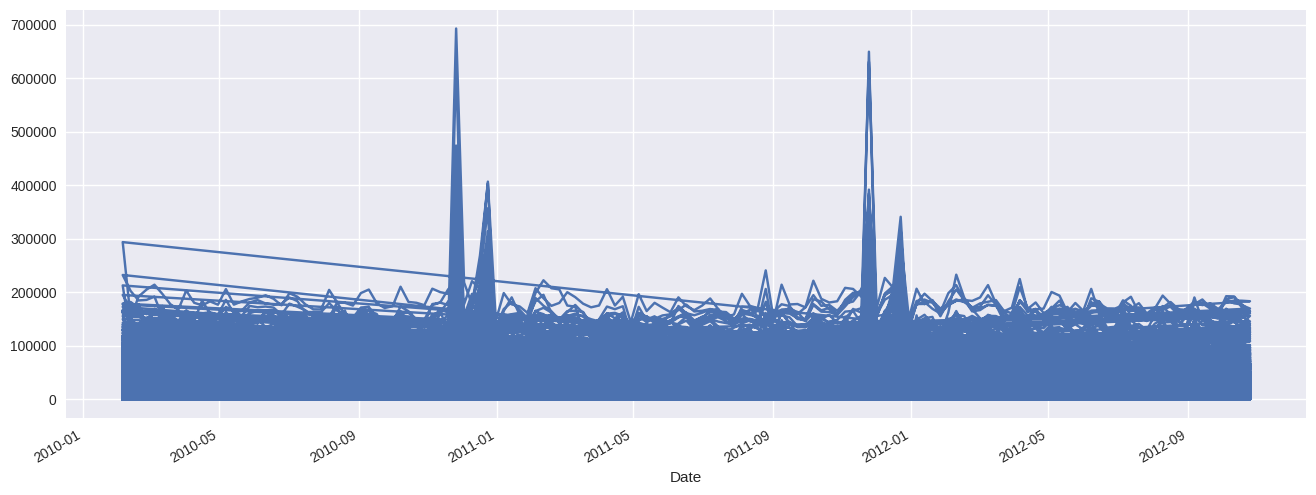

In [117]:
plt.figure(figsize=(16,6))
df['Weekly_Sales'].plot()
plt.show()

Dalam data ini, ada banyak nilai data yang sama. Jadi, saya akan mengumpulkannya secara mingguan.

In [118]:
# Define aggregation rules for each column type
agg_rules = {
    # Numeric columns: take the mean
    'Weekly_Sales': 'mean',
    'Temperature': 'mean',
    'Fuel_Price': 'mean',
    'MarkDown1': 'mean',
    'MarkDown2': 'mean',
    'MarkDown3': 'mean',
    'MarkDown4': 'mean',
    'MarkDown5': 'mean',
    'CPI': 'mean',
    'Unemployment': 'mean',
    'Size': 'mean',
    'week': 'mean',
    'month': 'mean',
    'year': 'mean',

    # Non-numeric columns: take the first occurrence
    'Store': 'first',
    'Dept': 'first',
    'Type': 'first',
    'IsHoliday': 'first',
    'Super_Bowl': 'first',
    'Labor_Day': 'first',
    'Thanksgiving': 'first',
    'Christmas': 'first'
}

# Resample with custom aggregation
df_week = df.resample('W').agg(agg_rules)

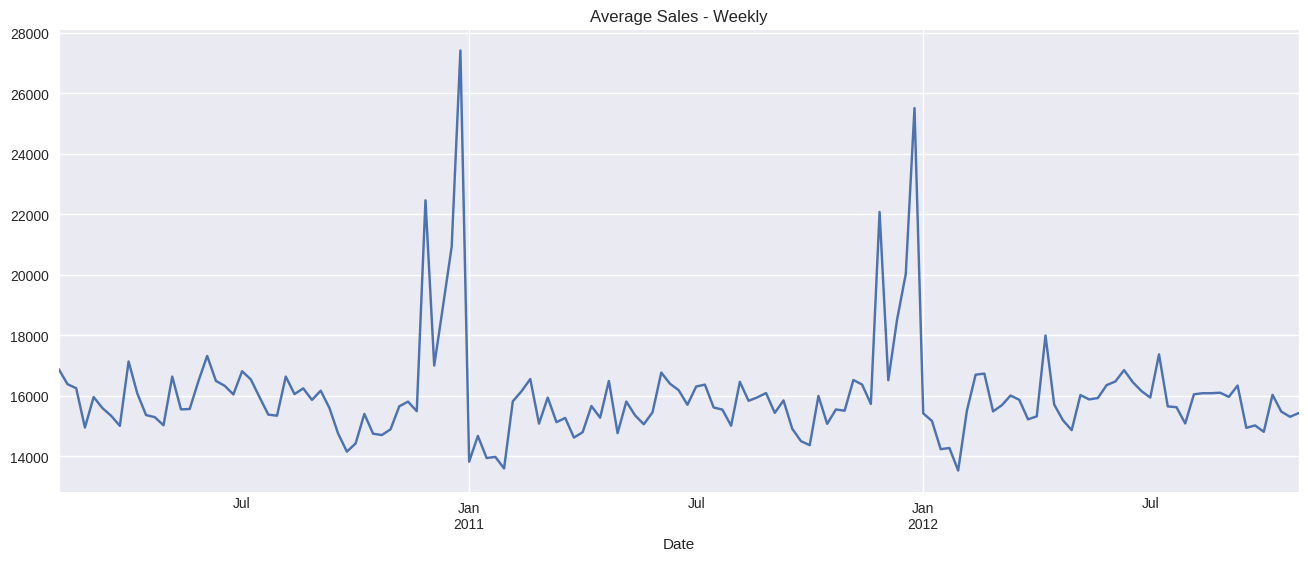

In [119]:
plt.figure(figsize=(16,6))
df_week['Weekly_Sales'].plot()
plt.title('Average Sales - Weekly')
plt.show()

Dengan pengumpulan data mingguan, saya dapat melihat rata-rata penjualan dengan jelas. Untuk melihat pola bulanan, saya juga mengubah sampel data saya menjadi bulanan.

In [120]:
# Define aggregation rules for monthly resampling
agg_rules_monthly = {
    # ---- Numeric columns (compute mean) ----
    'Weekly_Sales': 'mean',
    'Temperature': 'mean',
    'Fuel_Price': 'mean',
    'MarkDown1': 'mean',
    'MarkDown2': 'mean',
    'MarkDown3': 'mean',
    'MarkDown4': 'mean',
    'MarkDown5': 'mean',
    'CPI': 'mean',
    'Unemployment': 'mean',
    'Size': 'mean',
    'week': 'mean',    # Optional: Use 'first' if week numbers shouldn't be averaged
    'month': 'first',  # Use 'first' since month is already aligned
    'year': 'first',   # Use 'first' since year is already aligned

    # ---- Non-numeric columns (keep first occurrence) ----
    'Store': 'first',
    'Dept': 'first',
    'Type': 'first',
    'IsHoliday': 'max',  # Use 'max' to check if any holiday occurred in the month
    'Super_Bowl': 'max',
    'Labor_Day': 'max',
    'Thanksgiving': 'max',
    'Christmas': 'max'
}

# Resample monthly with custom rules
df_month = df.resample('MS').agg(agg_rules_monthly)  # 'MS' = Month Start

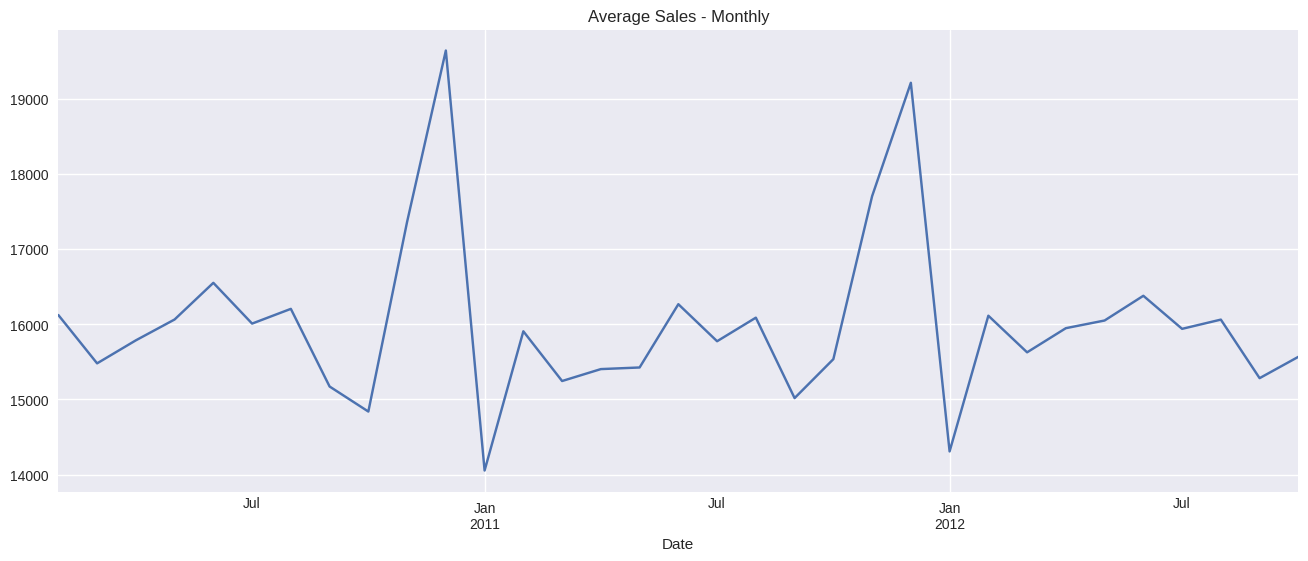

In [121]:
plt.figure(figsize=(16,6))
df_month['Weekly_Sales'].plot()
plt.title('Average Sales - Monthly')
plt.show()

Ketika saya mengubah data menjadi data bulanan, saya menyadari bahwa saya kehilangan beberapa pola dalam data mingguan. Jadi, saya akan melanjutkan dengan data yang diambil sampelnya kembali secara mingguan.

# To Observe 2-weeks Rolling Mean and Std

Data saya tidak stasioner. Jadi, saya akan mencoba mencari versi yang lebih stasioner.

In [122]:
# finding 2-weeks rolling mean and std
roll_mean = df_week['Weekly_Sales'].rolling(window=2, center=False).mean()
roll_std = df_week['Weekly_Sales'].rolling(window=2, center=False).std()

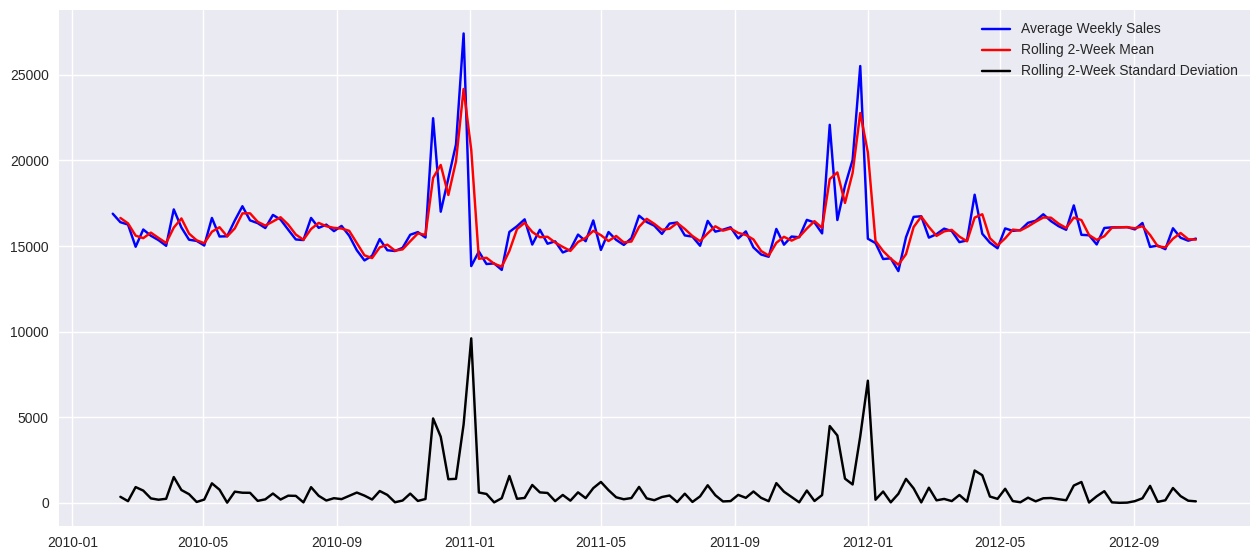

In [123]:
fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(df_week['Weekly_Sales'], color='blue',label='Average Weekly Sales')
ax.plot(roll_mean, color='red', label='Rolling 2-Week Mean')
ax.plot(roll_std, color='black', label='Rolling 2-Week Standard Deviation')
ax.legend()
fig.tight_layout()

# Adfuller Test to Make Sure

In [124]:
adfuller(df_week['Weekly_Sales'])

(-5.927107223737572,
 2.4290492082042356e-07,
 4,
 138,
 {'1%': -3.47864788917503,
  '5%': -2.882721765644168,
  '10%': -2.578065326612056},
 2261.596421168073)

Dari pengujian dan pengamatan saya, data saya tidak stasioner. Jadi, saya akan mencoba menemukan versi yang lebih stasioner.

# Train - Test Split of Weekly Data

Untuk melakukan pemisahan uji-latihan secara berkesinambungan, saya membaginya secara manual, tidak secara acak.

In [125]:
train_data = df_week[:int(0.7*(len(df_week)))]
test_data = df_week[int(0.7*(len(df_week))):]

print('Train:', train_data.shape)
print('Test:', test_data.shape)

Train: (100, 22)
Test: (43, 22)


1. Total Data:
  - Training + Test = 100 + 43 = 143 baris.
  - Kolom: 22 fitur (termasuk target dan variabel prediktor).
2. Proporsi:
  - Training set: 100/143 ≈ 70%.
  - Test set: 43/143 ≈ 30%.
  - Pembagian sesuai ekspektasi.
3. Struktur Data:
  - Kolom (22) sama di kedua set, artinya fitur telah dikonsistenkan.

In [126]:
target = "Weekly_Sales"
used_cols = [c for c in df_week.columns.to_list() if c not in [target]] # all columns except price

# assigning train-test X-y values

X_train = train_data[used_cols]
X_test = test_data[used_cols]
y_train = train_data[target]
y_test = test_data[target]

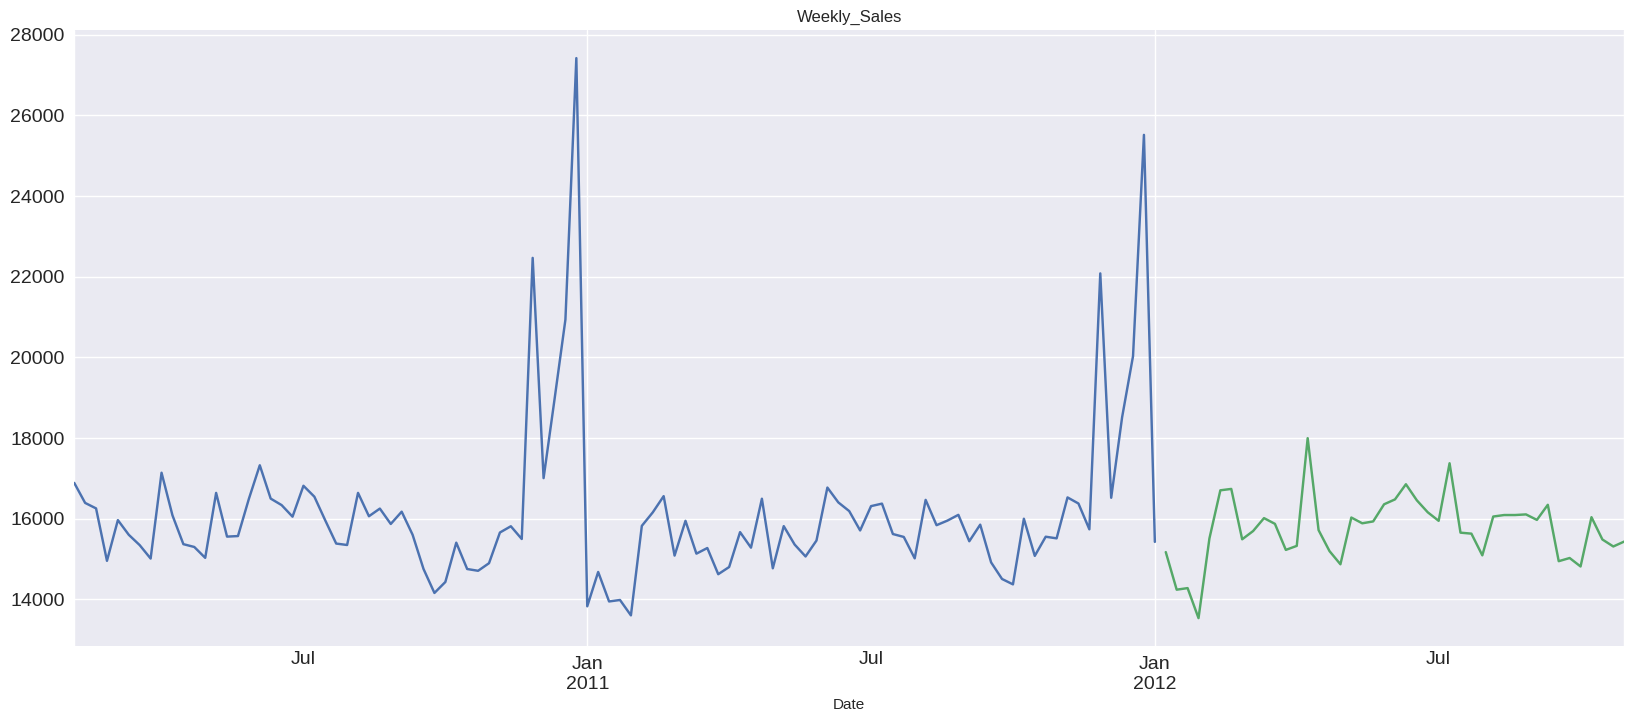

In [127]:
train_data['Weekly_Sales'].plot(figsize=(20,8), title= 'Weekly_Sales', fontsize=14)
test_data['Weekly_Sales'].plot(figsize=(20,8), title= 'Weekly_Sales', fontsize=14)
plt.show()

Garis biru menunjukkan data kereta saya, sedangkan garis kuning menunjukkan data uji.

# Decomposing Weekly Data to Observe Seasonality

In [128]:
decomposed = decompose(df_week['Weekly_Sales'].values, 'additive', m=20) #decomposing of weekly data

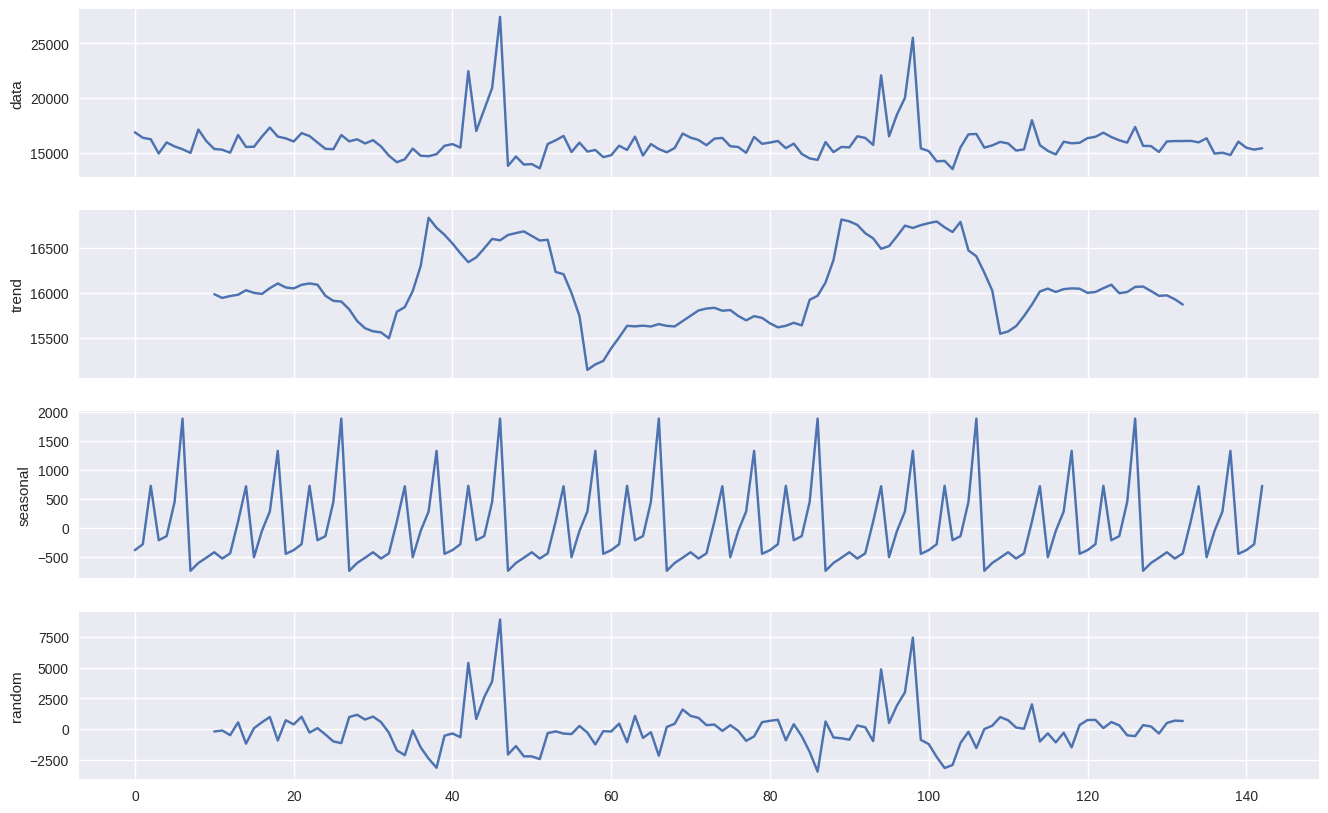

In [129]:
decomposed_plot(decomposed, figure_kwargs={'figsize': (16, 10)})
plt.show()

Dari grafik di atas, setiap 20 langkah kemusiman bertemu di titik awal. Ini membantu saya untuk menyempurnakan model saya.

# Trying To Make Data More Stationary

Sekarang, saya akan mencoba membuat data saya lebih stasioner. Untuk melakukannya, saya akan mencoba model dengan data yang dibedakan, dicatat, dan digeser.

## 1. Difference

In [130]:
df_week_diff = df_week['Weekly_Sales'].diff().dropna() #creating difference values

In [131]:
# taking mean and std of differenced data
diff_roll_mean = df_week_diff.rolling(window=2, center=False).mean()
diff_roll_std = df_week_diff.rolling(window=2, center=False).std()

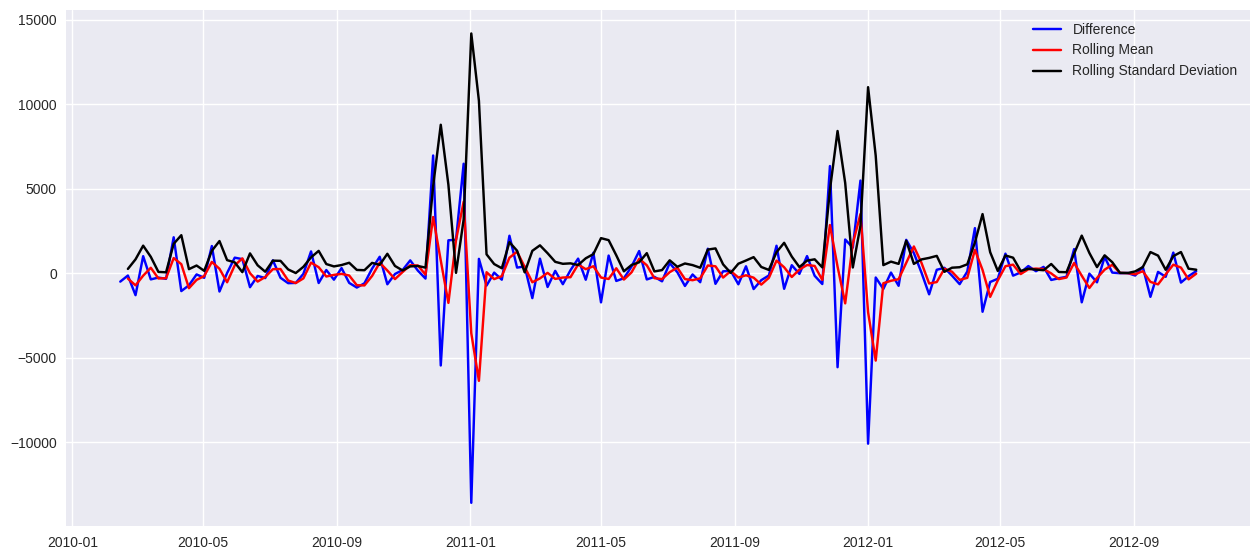

In [132]:
fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(df_week_diff, color='blue',label='Difference')
ax.plot(diff_roll_mean, color='red', label='Rolling Mean')
ax.plot(diff_roll_std, color='black', label='Rolling Standard Deviation')
ax.legend()
fig.tight_layout()

## 2.Shift

In [133]:
df_week_lag = df_week['Weekly_Sales'].shift().dropna() #shifting the data

In [134]:
lag_roll_mean = df_week_lag.rolling(window=2, center=False).mean()
lag_roll_std = df_week_lag.rolling(window=2, center=False).std()

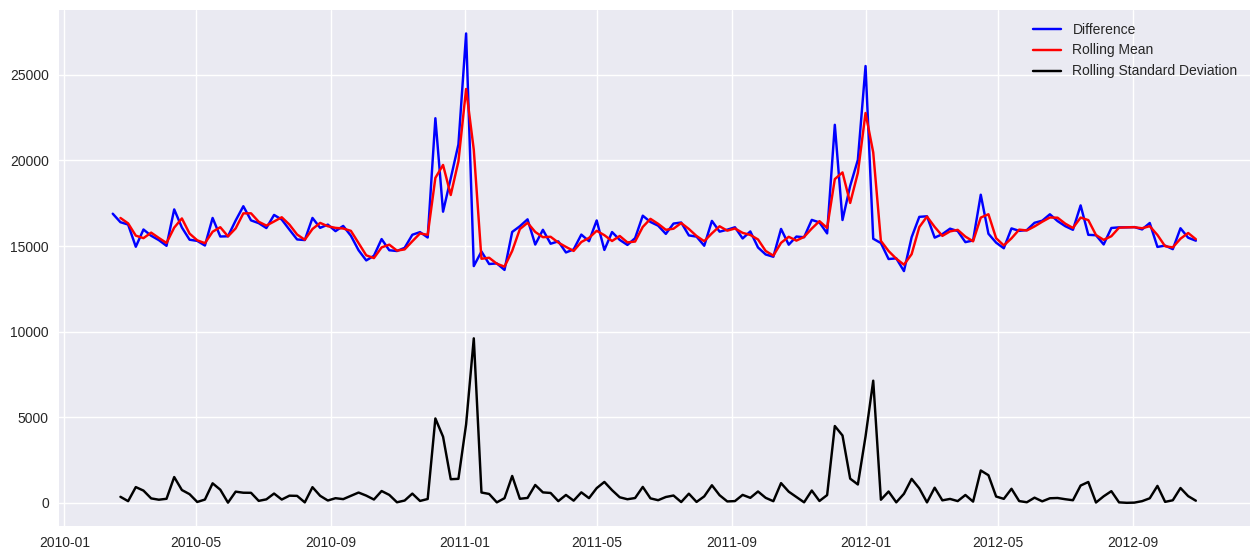

In [135]:
fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(df_week_lag, color='blue',label='Difference')
ax.plot(lag_roll_mean, color='red', label='Rolling Mean')
ax.plot(lag_roll_std, color='black', label='Rolling Standard Deviation')
ax.legend()
fig.tight_layout()

## 3.Log

In [136]:
logged_week = np.log1p(df_week['Weekly_Sales']).dropna() #taking log of data

In [137]:
log_roll_mean = logged_week.rolling(window=2, center=False).mean()
log_roll_std = logged_week.rolling(window=2, center=False).std()

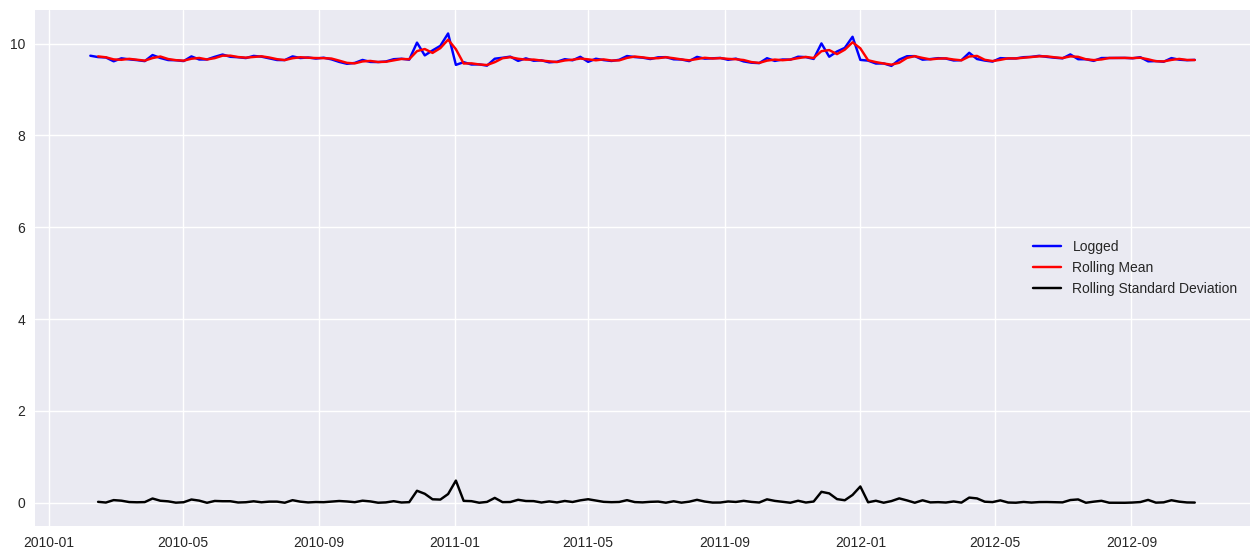

In [138]:
fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(logged_week, color='blue',label='Logged')
ax.plot(log_roll_mean, color='red', label='Rolling Mean')
ax.plot(log_roll_std, color='black', label='Rolling Standard Deviation')
ax.legend()
fig.tight_layout()

# Auto-ARIMA MODEL

Saya mencoba data saya tanpa perubahan apa pun, lalu mencoba dengan menggeser, mengambil versi log dan perbedaan data. Data yang dibedakan memberikan hasil terbaik. Jadi, saya memutuskan untuk mengambil perbedaan dan menggunakan data ini.

# Train-Test Split
Pemodelan ARIMA
- Fungsi: `auto_arima()` mencari model ARIMA terbaik secara otomatis.
- Parameter Kunci:
  - `seasonal=True`: Cari komponen musiman.
  - `information_criterion='aic'`: Pilih model dengan AIC terendah.
  - `stepwise=False`: Cari semua kombinasi parameter (lebih lama tapi akurat).

In [139]:
train_data_diff = df_week_diff [:int(0.7*(len(df_week_diff )))]
test_data_diff = df_week_diff [int(0.7*(len(df_week_diff ))):]

train_data = train_data['Weekly_Sales']
test_data = test_data['Weekly_Sales']

model_auto_arima = auto_arima(train_data_diff, trace=True,start_p=0, start_q=0, start_P=0, start_Q=0,
                  max_p=20, max_q=20, max_P=20, max_Q=20, seasonal=True,maxiter=200,
                  information_criterion='aic',stepwise=False, suppress_warnings=True, D=1, max_D=10,
                  error_action='ignore',approximation = False)
model_auto_arima.fit(train_data_diff)

 ARIMA(0,0,0)(0,0,0)[1] intercept   : AIC=1826.858, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[1] intercept   : AIC=1793.619, Time=0.58 sec
 ARIMA(0,0,2)(0,0,0)[1] intercept   : AIC=1795.532, Time=1.08 sec
 ARIMA(0,0,3)(0,0,0)[1] intercept   : AIC=inf, Time=0.71 sec
 ARIMA(0,0,4)(0,0,0)[1] intercept   : AIC=inf, Time=0.73 sec
 ARIMA(0,0,5)(0,0,0)[1] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(1,0,0)(0,0,0)[1] intercept   : AIC=1804.051, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[1] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(1,0,2)(0,0,0)[1] intercept   : AIC=1794.966, Time=0.21 sec
 ARIMA(1,0,3)(0,0,0)[1] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(1,0,4)(0,0,0)[1] intercept   : AIC=inf, Time=0.88 sec
 ARIMA(2,0,0)(0,0,0)[1] intercept   : AIC=1801.215, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[1] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(2,0,2)(0,0,0)[1] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(2,0,3)(0,0,0)[1] intercept   : AIC=inf, Time=0.85 sec
 ARIMA(3,0,0)(0,0,0)[1] intercept   : AIC=1791.045, Tim

ARIMA(maxiter=200, order=(3, 0, 2), scoring_args={},
      seasonal_order=(0, 0, 0, 1), suppress_warnings=True)

Detail Model Terbaik:
- Orde Non-Musiman (p,d,q): (3, 0, 2)
    - `p=3`: Autoregressive (AR) orde 3 (bergantung pada 3 lag sebelumnya).
    - `d=0`: Tidak diperlukan differencing (data sudah stasioner).
    - `q=2`: Moving Average (MA) orde 2.
- Orde Musiman (P,D,Q): (0, 0, 0)[1]
  - Tidak ada komponen musiman yang signifikan (frekuensi musiman=1).
  - Intercept: Model menyertakan intercept (rata-rata residual ≠ 0).
  - AIC Terendah: 1782.922 (dibandingkan model lainnya).
Proses Seleksi:
- Model dengan AIC terendah dipilih sebagai terbaik.
- Beberapa kombinasi menghasilkan AIC=inf (tidak konvergen atau tidak valid).

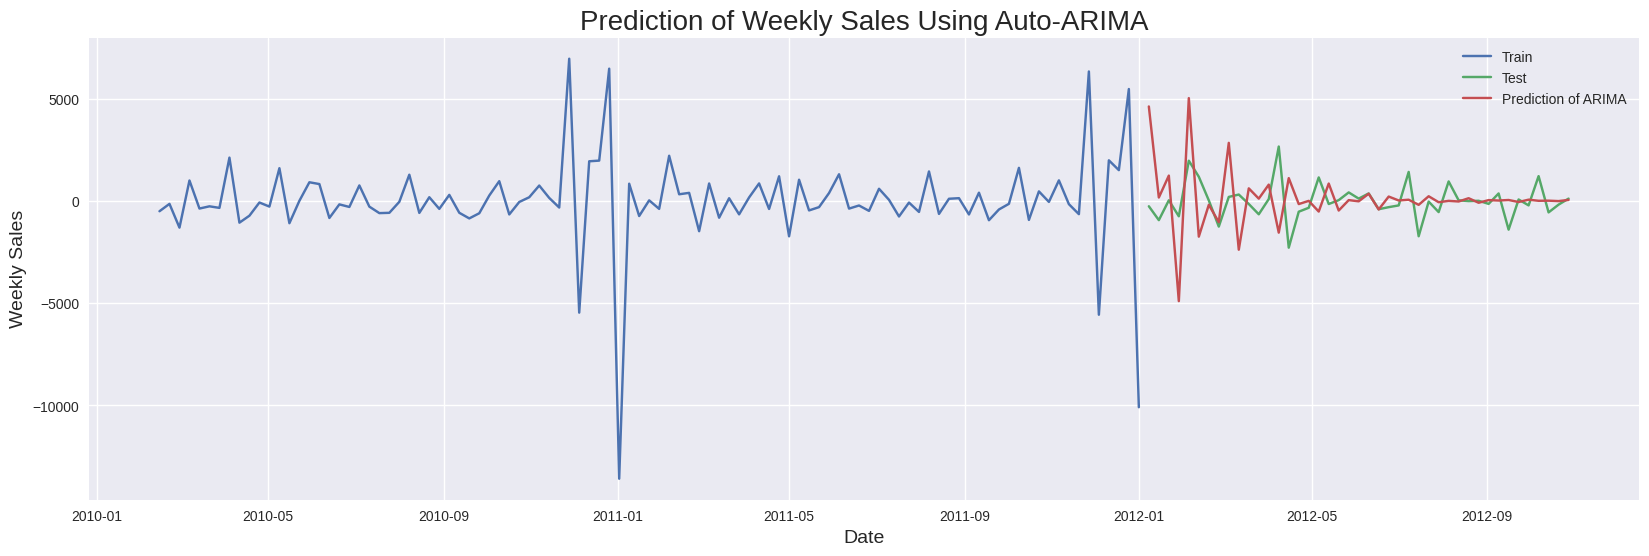

In [140]:
y_pred = model_auto_arima.predict(n_periods=len(test_data_diff))
y_pred = pd.DataFrame(y_pred,index = test_data.index,columns=['Prediction'])
plt.figure(figsize=(20,6))
plt.title('Prediction of Weekly Sales Using Auto-ARIMA', fontsize=20)
plt.plot(train_data_diff, label='Train')
plt.plot(test_data_diff, label='Test')
plt.plot(y_pred, label='Prediction of ARIMA')
plt.legend(loc='best')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Weekly Sales', fontsize=14)
plt.show()

**Tren Prediksi**: Garis prediksi (merah) tidak mampu menangkap fluktuasi musiman/trend.

**Error**: Deviasi besar terlihat jelas, terutama di puncak/trough data aktual.

#### Penyebab Model Buruk Lebih Rendah Performanya
1. Tidak Menangkap Komponen Time Series
Masalah: Model linear sederhana mengasumsikan hubungan konstan antara waktu dan penjualan, tanpa memperhitungkan:
  - Autokorelasi (ketergantungan nilai saat ini pada nilai sebelumnya).
  - Musiman (pola berulang tiap tahun/kuartal).
  - Contoh: Prediksi flat di tengah fluktuasi musiman.
2. Over-Simplifikasi
  - Model Buruk:
  ```
  from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train, y_train)  # Hanya menggunakan fitur
```
  - waktu sederhana
Hasil: Gagal memodelkan kompleksitas data deret waktu.

3. Tidak Ada Differencing/Transformasi
  - ARIMA: Otomatis melakukan differencing jika data tidak stasioner (d=0 atau d=1).
  - Model Buruk: Memproses data mentah tanpa transformasi, menghasilkan residual yang tidak acak.

# ExponentialSmoothing

Saya memeriksa model Holt-Winters yang sesuai dengan data saya. Perataan Eksponensial digunakan saat data memiliki tren, dan meratakan tren. Metode tren teredam menambahkan parameter peredaman sehingga tren konvergen ke nilai konstan di masa mendatang.

Data perbedaan saya memiliki beberapa nilai minus dan nol, jadi saya menggunakan musiman aditif dan tren alih-alih perkalian. Periode musiman dipilih dari grafik terurai di atas. Untuk menyetel model dengan iterasi, butuh waktu terlalu lama, jadi saya mengubah dan mencoba model untuk parameter yang berbeda dan menemukan parameter terbaik serta menyesuaikannya dengan model.

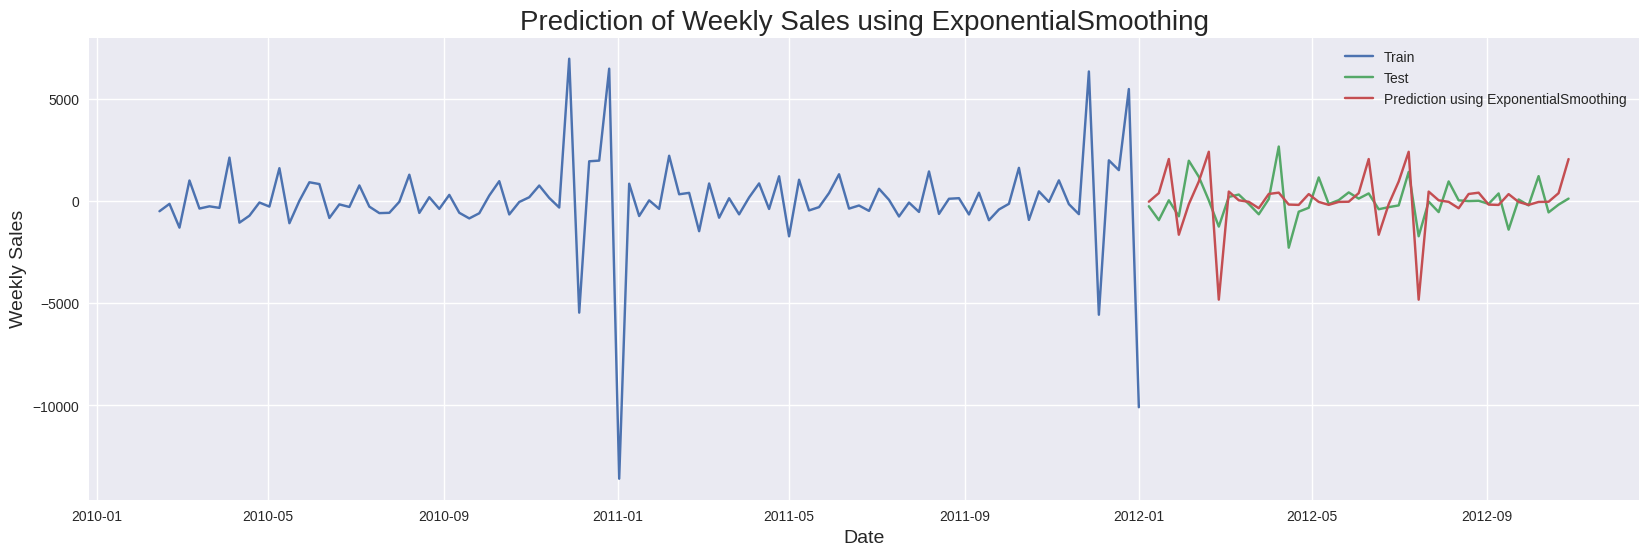

In [141]:
model_holt_winters = ExponentialSmoothing(train_data_diff, seasonal_periods=20, seasonal='additive',
                                           trend='additive',damped=True).fit() #Taking additive trend and seasonality.
y_pred = model_holt_winters.forecast(len(test_data_diff))# Predict the test data

#Visualize train, test and predicted data.
plt.figure(figsize=(20,6))
plt.title('Prediction of Weekly Sales using ExponentialSmoothing', fontsize=20)
plt.plot(train_data_diff, label='Train')
plt.plot(test_data_diff, label='Test')
plt.plot(y_pred, label='Prediction using ExponentialSmoothing')
plt.legend(loc='best')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Weekly Sales', fontsize=14)
plt.show()


Grafik:
- Jika garis prediksi mengikuti pola data aktual di periode test, model dianggap baik.
- Jika melenceng jauh, mungkin perlu tuning parameter (contoh: `trend='add'`, `seasonal='mul'`).
- Negatif pada Grafik: Pastikan apakah nilai negatif adalah hasil transformasi (misalnya, differencing) atau memang penjualan rugi.

In [142]:
wmae_test(test_data_diff, y_pred)

840.681060966696

Pada akhirnya, saya menemukan hasil terbaik untuk data saya dengan Model Pemulusan Eksponensial.

Hasil terbaik saya untuk proyek ini adalah nilai WMAE 840. Berdasarkan jumlah penjualan, nilai ini kira-kira sekitar 4-5% kesalahan.

Rata-rata `Weekly_Sales` (misalnya, jika rata-rata penjualan 20,000, error 840.68 = 4.2% termasuk baik).